Temps estimés :
- Parties 2/3 lois et théorèmes : 1/2 journée
- 4.2.1 > 4.2.3 : 1 journée
- 4.2.4 : 1/2 journée
- 5 enquête bonheur : 1/2 journée

Signification des émoticones :
- 🌞 : documentations importantes
- 🌚 : en complément
- (vide) : à vous de voir

# Import des librairies

In [1]:
# manipulation de dataframes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from statsmodels.distributions.empirical_distribution import ECDF
from pathlib import Path
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import binomtest
from scipy.stats import chi2_contingency

plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.facecolor"] = "#f1f3f9"

In [2]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

🌞 https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# Quelques lois intéressantes à connaitre en statistiques

Nous notons ici différentes lois intéressantes en statistiques. L'idée ici n'est pas de les connaitre toutes dans un premier temps, mais de savoir qu'elles existent. L'intérêt des lois pour nous aujourd'hui est de pouvoir comparer la distribution de nos variables à ces lois.

## Modèles discrets

Les variables aléatoires <b/>discrètes</b> prennent <b/>un nombre fini ou dénombrable</b> de valeurs distinctes.</br>
</br>

- Loi Uniforme : https://fr.wikipedia.org/wiki/Loi_uniforme_discr%C3%A8te</br>
La probabilité que la variable aléatoire X prenne chacune des valeurs de son support est identique, autrement dit, il y a équiprobabilité.</br>
</br>

- Loi de Bernouilli : https://fr.wikipedia.org/wiki/Loi_de_Bernoulli</br>
On considère une épreuve aléatoire à deux issues. L'une est considérée comme le succès, l'autre comme l'échec. C'est ce que l'on appelle une épreuve de Bernoulli.</br>
Par exemple, on lance un dé. On obtient 6, c'est le succès. On n'obtient pas 6, c'est l'échec.</br>
</br>

- Loi Binomiale : https://fr.wikipedia.org/wiki/Loi_binomiale</br>
On considère à nouveau une épreuve de Bernoulli : épreuve aléatoire à deux issues. L'une est considérée comme le succès, l'autre comme l'échec. Cette fois, on répète cette épreuve de manière identique et indépendante pour obtenir ce que l'on appelle un schéma de Bernoulli. </br>
Exemple : on reprend le lancer de dé. On lance ce dé un certain nombre de fois. Disons n fois, n étant un entier naturel non nul. On désigne par X la VAD qui compte le nombre de succès, c'est-à-dire le nombre de fois où on a obtenu un 6.

🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5327541-apprenez-a-utiliser-quelques-lois-usuelles-discretes

## Modèles continus

Les variables aléatoires <b/>continues</b> peuvent prendre <b/>une infinité de valeurs</b> dans un intervalle donné.</br>

- Loi Uniforme : https://fr.wikipedia.org/wiki/Loi_uniforme_continue</br>
Toutes les valeurs possibles d'un intervalle donné ont la même probabilité de se produire.</br>

- Loi Normale : https://fr.wikipedia.org/wiki/Loi_normale</br>
C'est une loi symétrique en forme de cloche, où la majorité des valeurs se concentrent autour de la moyenne, avec une décroissance des probabilités à mesure que l'on s'éloigne de celle-ci.</br>

- Loi de Student : https://fr.wikipedia.org/wiki/Loi_de_Student</br>
Cette loi est utilisée pour estimer les moyennes de populations normalement distribuées lorsqu'on a un petit échantillon, caractérisée par des queues plus épaisses que celles de la loi normale.</br>

- Loi du Chi-Deux : https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2</br>
On l'utilise pour tester l'adéquation entre des données observées et des données théoriques. Elle est souvent appliquée dans les tests d'indépendance et les tests d'ajustement.

🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5437151-familiarisez-vous-avec-quelques-lois-usuelles-continues

## Focus sur la Loi Normale : la plus intéressante pour nous aujourd'hui

Générons de manière aléatoire une variable température (de moyenne 15°C et d'écart-type 3°C par exemple) qui suivrait une loi Normale afin de se rendre compte de la forme qu'elle a :

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Que se passe-t-il si on joue avec la size ?

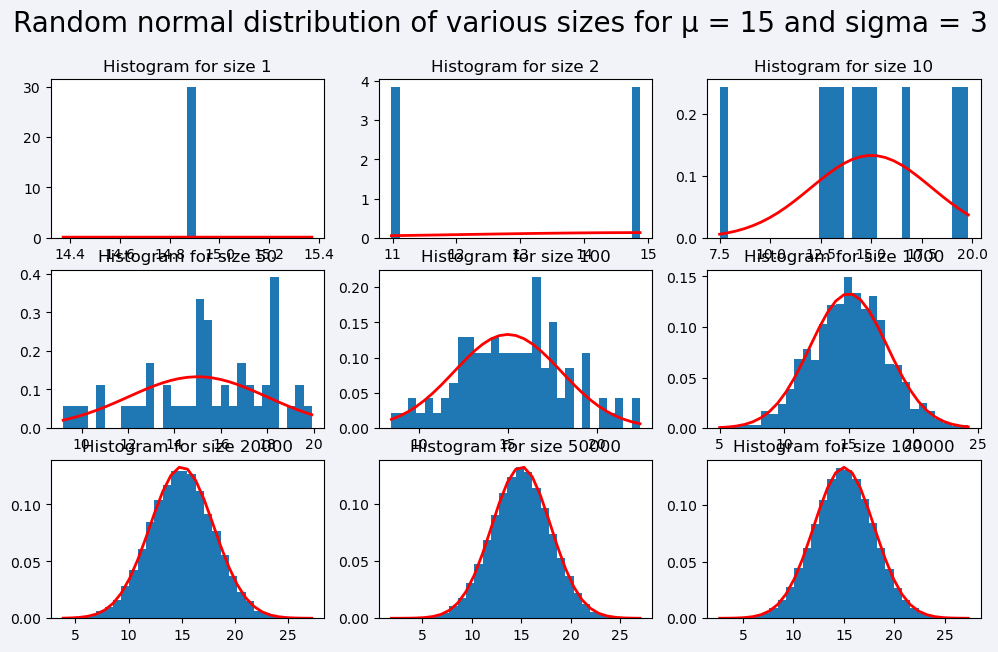

In [3]:
mu = 15
sigma = 3
sizes = [1, 2, 10, 50, 100, 1000, 20000, 50000, 100000]

fig = plt.figure()

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for size, axs in zip(sizes, axes):

    s = np.random.normal(loc=mu, scale=sigma, size=size)
    count, bins, ignored = axs.hist(s, 30, density=True)
    axs.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
             linewidth=2, color='r')
    axs.set_title(f"Histogram for size {size}")
    fig.suptitle("Random normal distribution of various sizes for µ = 15 and sigma = 3", fontsize=20)

plt.show()

# Quelques théorèmes fondamentaux à connaitre en statistiques

## La loi des grands nombres

Ressources :</br>
- 🌞 https://www.youtube.com/watch?v=HRnYFpdR8WM
- https://fr.wikipedia.org/wiki/Loi_des_grands_nombres
- 🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5422416-decouvrez-la-loi-faible-des-grands-nombres

**En résumé** : elle signifie que la moyenne empirique (calculée sur les valeurs d’un échantillon), converge vers l’espérance (moyenne de la population globale réelle : extrapolation) lorsque la taille de l’échantillon tend vers l’infini.

## Le Théorème Central Limite (TCL)

Ressources :</br>
- 🌞 https://www.youtube.com/watch?v=4dhm2QAA2x4
- 🌞 https://www.youtube.com/watch?v=YAlJCEDH2uY
- https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite
- 🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5422586-utilisez-le-theoreme-central-limite
- 🌚 Afin de bien saisir la notion, vous pouvez jouer avec ce simulateur : https://im2ag-shiny.univ-grenoble-alpes.fr/fcorset/TCL/
- 🌚 Un autre petit jeu à explorer pour comprendre : https://probastat.dyndoc.fr/statinf/aep

**En résumé** : il établit la convergence en loi de la somme d'une suite de variables aléatoires vers la loi normale.

# Sujet 1 : Les passagers du Titanic

🌞 Source : https://www.kaggle.com/datasets/vinicius150987/titanic3

## A quoi ressemblent nos données ?

### Importons le jeu de données

In [4]:
data_path = Path().resolve().parent / "data"

data_titanic = pd.read_csv(data_path/"titanic_complet.csv", delimiter=";")
data_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [5]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.4+ KB


In [6]:
data_titanic["fare"] = [float(str(i).replace(",", ".")) for i in data_titanic["fare"]]
data_titanic["age"] = [float(str(i).replace(",", ".")) for i in data_titanic["age"]]
data_titanic[["age", "fare"]] = data_titanic[["age", "fare"]].astype("float64")
data_titanic[["pclass", "survived"]] = data_titanic[["pclass", "survived"]].astype("object")


data_titanic.rename(columns={"home.dest": "home_dest"}, inplace=True)

data_titanic.drop(index=[1309], inplace=True)

### Combien y a-t-il de personnes sur le paquebot ?

In [7]:
nombre_personnes = data_titanic.shape[0] - data_titanic['name'].isna().sum()
print(f"Nombre de personnes sur le paquebot : {nombre_personnes}")

Nombre de personnes sur le paquebot : 1309


In [8]:
data_titanic["name"].nunique()

1307

but

In [9]:
data_titanic["name"].isna().sum()

0

In [10]:
duplicate = data_titanic[data_titanic["name"].duplicated()]
duplicate

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


but

In [11]:
data_titanic[data_titanic["name"] == "Kelly, Mr. James"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


not the same person!

### Combien d'informations a-t-on sur ces personnes ?

We have its class ("pclass"), if the person survived or not ("survived", where 0 means No and 1 means Yes), their names ("name"), sex ("sex"), age ("age"), the number of siblings ("sibsp"), number of pqrents ("parch"), their ticket number ("ticket"), their ticket²s fare ("fare"), their cabin in the ship ("cabin"), the port where they embarked ("embarked"), their lifeboat ("boat") which is NaN for the ones who didn't survived, their body identification number ("body") in they case they have deceased and been found, and finaly their destination ("home.dest").

### Regardons les premières lignes de nos données afin de se faire une idée

In [12]:
data_titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Réalisons un résumé statistique afin d'avoir une idée des chiffres globaux

In [13]:
data_titanic.describe()

,age,sibsp,parch,fare,body
count,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,29.881135,0.498854,0.385027,33.295479,160.809917
std,14.413500,1.041658,0.865560,51.758668,97.696922
min,0.166700,0.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,0.000000,7.895800,72.000000
50%,28.000000,0.000000,0.000000,14.454200,155.000000
75%,39.000000,1.000000,0.000000,31.275000,256.000000
max,80.000000,8.000000,9.000000,512.329200,328.000000


## Analyse univariée : quelles informations pourraient être intéressantes à regarder par variable ?

### Regardons les variables qualitatives

#### Quelles sont les variables qualitatives ?

In [14]:
for col, coltype in data_titanic.dtypes.items():
    if coltype == "object":
        print(col)

pclass
survived
name
sex
ticket
cabin
embarked
boat
home_dest


#### Quelle est la part d'hommes et de femmes ?

In [15]:
total = data_titanic["sex"].value_counts().sum()

female_total = len(data_titanic[data_titanic["sex"] == "female"])
male_total = len(data_titanic[data_titanic["sex"] == "male"])

females_rate = female_total / total
males_rate = male_total / total

print(f"There were {female_total} females in the Titanic, representing {females_rate:.2%} of the total passengers, and \
{male_total} males, representing {males_rate:.2%} of the total passengers")

There were 466 females in the Titanic, representing 35.60% of the total passengers, and 843 males, representing 64.40% of the total passengers


### More direct:

In [16]:
part_hommes_femmes = data_titanic['sex'].value_counts(normalize=True) * 100
print(f"Part d'hommes et de femmes :\n{part_hommes_femmes}")

Part d'hommes et de femmes :
sex
male      64.400306
female    35.599694
Name: proportion, dtype: float64


Réalisons la table de contingence des effectifs et la table de contingence des fréquences:

https://fr.wikipedia.org/wiki/Fr%C3%A9quence_(statistiques)

In [17]:
data_crosstab = pd.crosstab(data_titanic["survived"], 
							data_titanic["sex"], 
							margins=True) 
data_crosstab

sex,female,male,All
survived,,,
0.0,127,682,809
1.0,339,161,500
All,466,843,1309


In [18]:
data_crosstab = pd.crosstab(data_titanic["survived"], 
							data_titanic["sex"], 
							margins=True, normalize=True) 
data_crosstab

sex,female,male,All
survived,,,
0.0,0.097021,0.521008,0.618029
1.0,0.258976,0.122995,0.381971
All,0.355997,0.644003,1.000000


In [19]:
data_crosstab = pd.crosstab(data_titanic["survived"], 
							data_titanic["sex"], 
							margins=True, normalize="columns") 
data_crosstab

sex,female,male,All
survived,,,
0.0,0.272532,0.809015,0.618029
1.0,0.727468,0.190985,0.381971


Of the females, 27.25% deceased, while 72.75% survived; of the males,  80.90% deceased while only 19.10% survived. From all passengers, 61.80% deceased while 38.20% survived.

In [20]:
data_crosstab = pd.crosstab(data_titanic["survived"], 
							data_titanic["sex"], 
							margins=True, normalize="index") 
data_crosstab

sex,female,male
survived,,
0.0,0.156984,0.843016
1.0,0.678000,0.322000
All,0.355997,0.644003


Of all that survived, 67.80% were female while 32.20% were males; of all that have deceased, 15.70% were females while 84.30% were male. Of all passengers that entered the Titanic that day, 35.60% were female zhile 64.40% were male.

#### Représentons ça sous forme de graphiques afin que ce soit plus visuel

Diagramme en barres en effectifs et diagramme en barres en proportion:

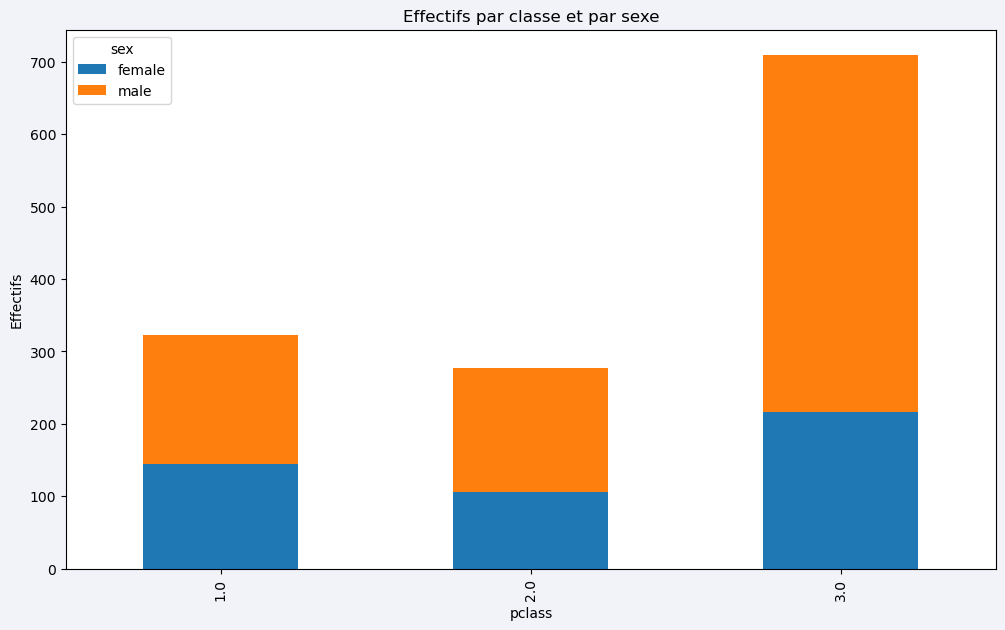

In [21]:
table_effectifs = pd.crosstab(data_titanic['pclass'], data_titanic['sex'])

# Diagramme en barres des effectifs
table_effectifs.plot(kind='bar', stacked=True)
plt.title("Effectifs par classe et par sexe")
plt.ylabel("Effectifs")
plt.show()

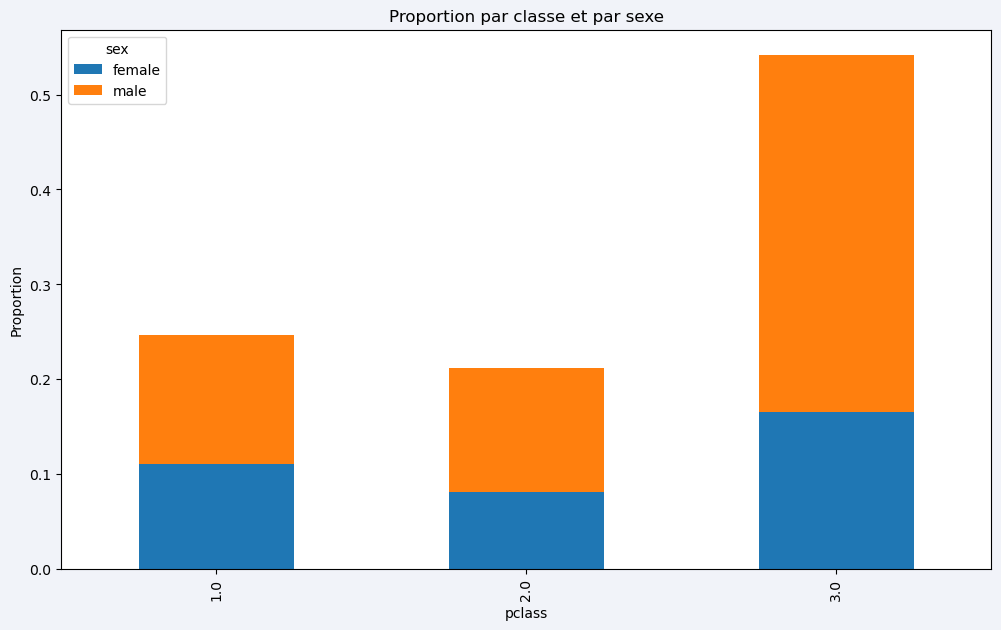

In [22]:
table_frequences = pd.crosstab(data_titanic['pclass'], data_titanic['sex'], normalize=True)

table_frequences.plot(kind='bar', stacked=True)
plt.title("Proportion par classe et par sexe")
plt.ylabel("Proportion")
plt.show()

<Axes: xlabel='sex', ylabel='survived'>

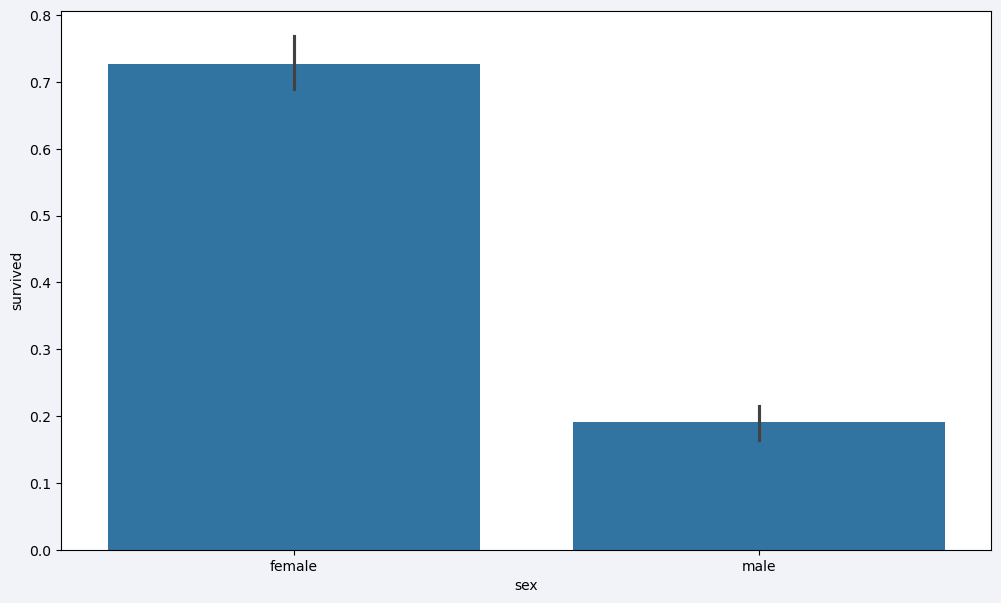

In [23]:
sns.barplot(data_titanic, x="sex", y="survived")

In [24]:
dff = data_crosstab

dff = dff / (dff.female.sum() + dff.male.sum())
dff

sex,female,male
survived,,
0.0,0.052328,0.281005
1.0,0.226000,0.107333
All,0.118666,0.214668


In [25]:
def bar_chart(df, col):

    survived = df[df["survived"] == 1][col].value_counts()
    dead = df[df["survived"] == 0][col].value_counts()

    dff = pd.DataFrame([survived, dead])
    dff.index = ["survived", "dead"]
    dff.plot(kind="bar", figsize=(10, 5))

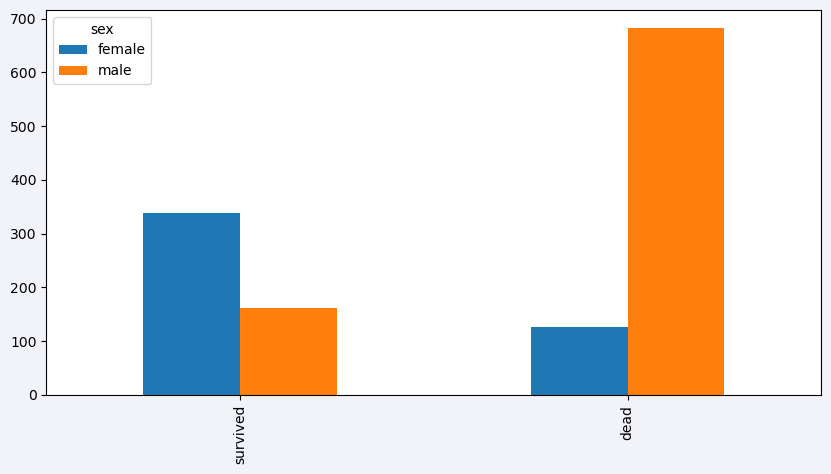

In [26]:
bar_chart(data_titanic, "sex")

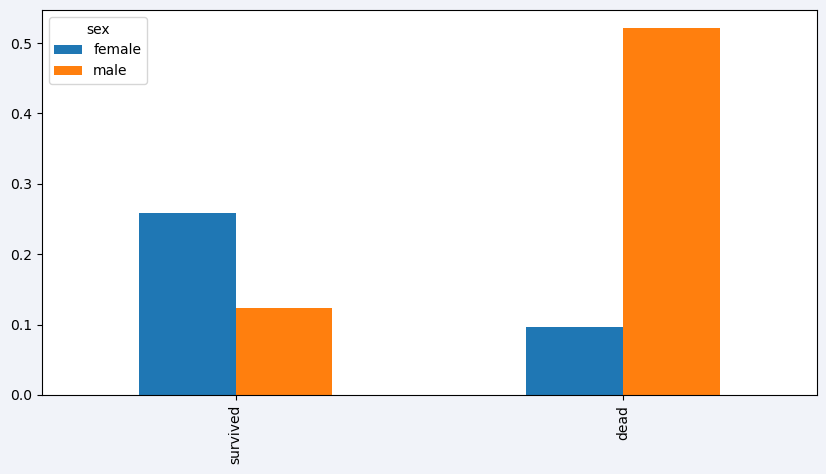

In [27]:
def bar_chart(df, col):

    survived = df[df["survived"] == 1][col].value_counts()
    dead = df[df["survived"] == 0][col].value_counts()

    dff = pd.DataFrame([survived, dead])
    dff.index = ["survived", "dead"]
    dff = dff / (dff.female.sum() + dff.male.sum())
    dff.plot(kind="bar", figsize=(10, 5))
    
bar_chart(data_titanic, "sex")

#### Continuez d'explorer ce qui vous semble intéressant !

In [28]:
data_crosstab = pd.crosstab(index=data_titanic["survived"], 
							columns=[data_titanic["sex"], data_titanic["pclass"]],
							margins=True) 
data_crosstab

sex      female           male             All
pclass      1.0  2.0  3.0  1.0  2.0  3.0      
survived                                      
0.0           5   12  110  118  146  418   809
1.0         139   94  106   61   25   75   500
All         144  106  216  179  171  493  1309

In [29]:
data_crosstab = pd.crosstab(index=data_titanic["survived"], 
							columns=[data_titanic["pclass"], data_titanic["sex"]],
							margins=True) 
data_crosstab

pclass      1.0         2.0         3.0        All
sex      female male female male female male      
survived                                          
0.0           5  118     12  146    110  418   809
1.0         139   61     94   25    106   75   500
All         144  179    106  171    216  493  1309

### Regardons les variables quantitatives

#### Quelles sont les variables quantitatives ?

In [30]:
for col, coltype in data_titanic.dtypes.items():
    if coltype != "object":
        print(col)

age
sibsp
parch
fare
body


#### Comment est représenté l'âge des voyageurs ?

Regardons le résumé statistiques :

In [31]:
data_titanic["age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

#### Comment peut-on regarder la répartition de l'âge sous forme de graphique ?

Regardons un diagramme en barre des effectifs / histogramme

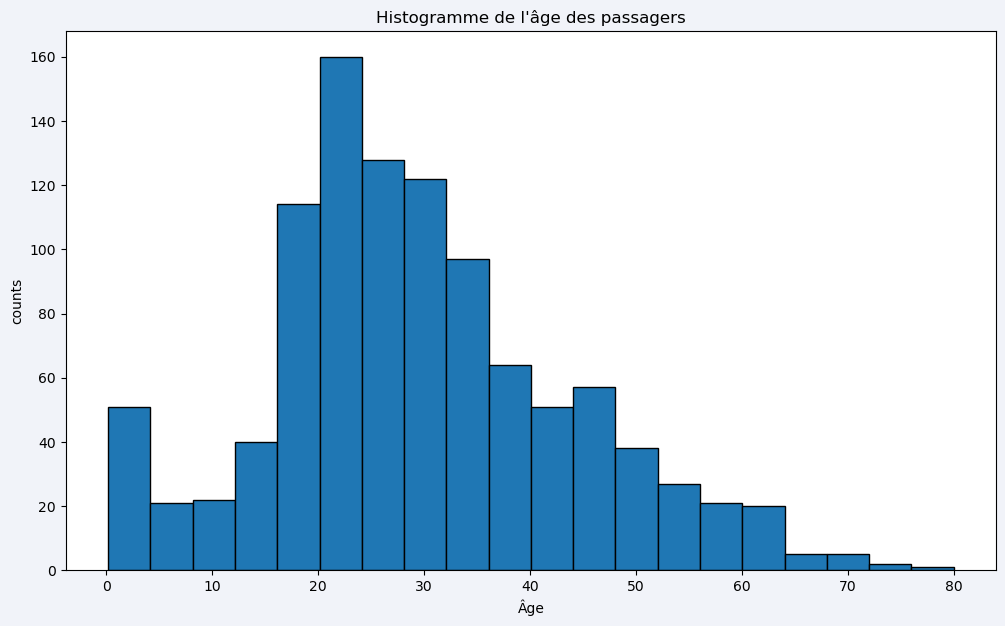

In [32]:
data_titanic['age'].dropna().plot(kind='hist', bins=20, edgecolor='black')
plt.title("Histogramme de l'âge des passagers")
plt.xlabel("Âge")
plt.ylabel("counts")
plt.show()

Regardons le boxplot :

https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches

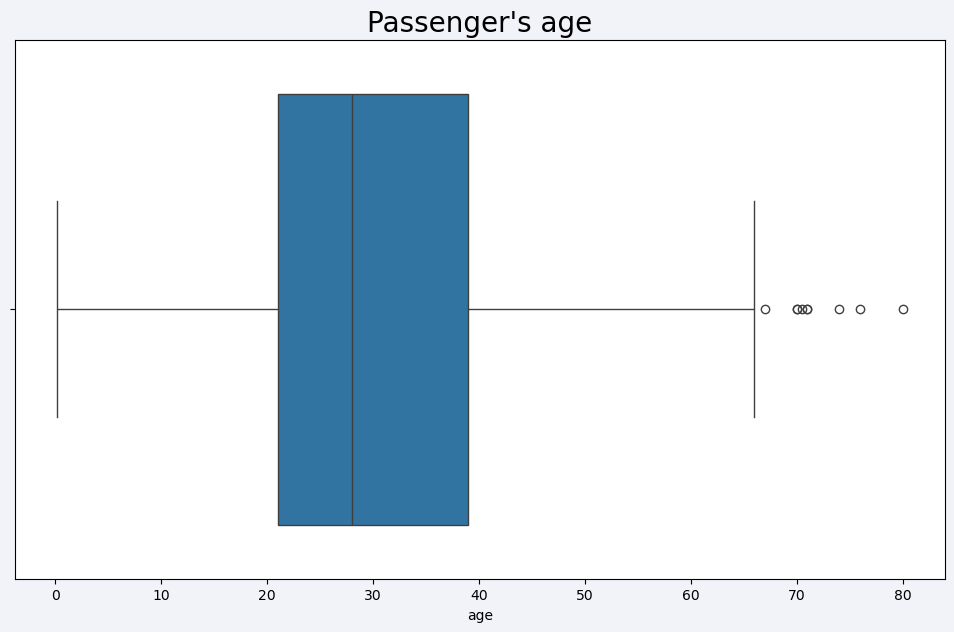

In [33]:
fig = plt.figure()

ax = fig.add_subplot()

sns.boxplot(data_titanic, x="age", ax=ax)

ax.set_title("Passenger's age", fontsize=20)

plt.show()

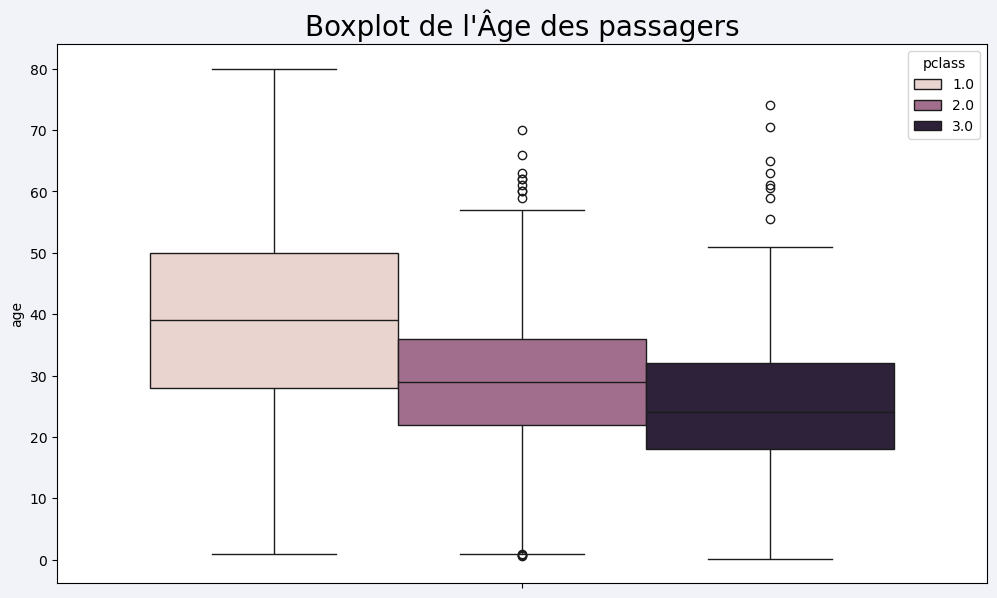

In [34]:
fig = plt.figure()

ax = fig.add_subplot()

sns.boxplot(data_titanic, y="age", hue="pclass", ax=ax)

ax.set_title("Boxplot de l'Âge des passagers", fontsize=20)

plt.show()

#### Continuez d'explorer ce qui vous semble intéressant !

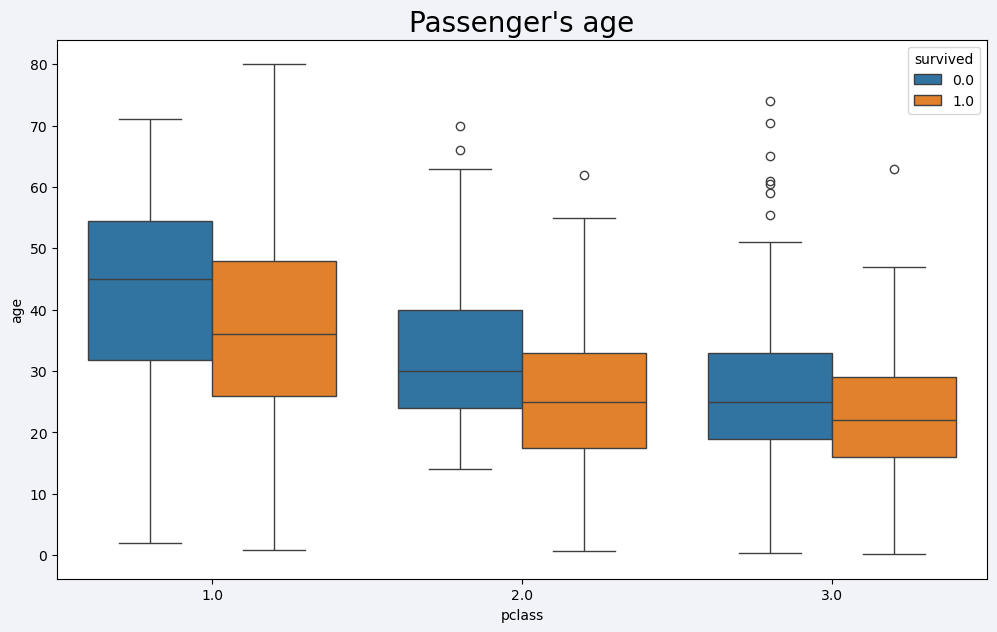

In [35]:
fig = plt.figure()

ax = fig.add_subplot()

sns.boxplot(data_titanic, x="pclass", y="age", hue="survived", ax=ax)

ax.set_title("Passenger's age", fontsize=20)

plt.show()

array([<Axes: title={'center': '1.0'}, ylabel='Frequency'>,
       <Axes: title={'center': '2.0'}, ylabel='Frequency'>,
       <Axes: title={'center': '3.0'}, ylabel='Frequency'>], dtype=object)

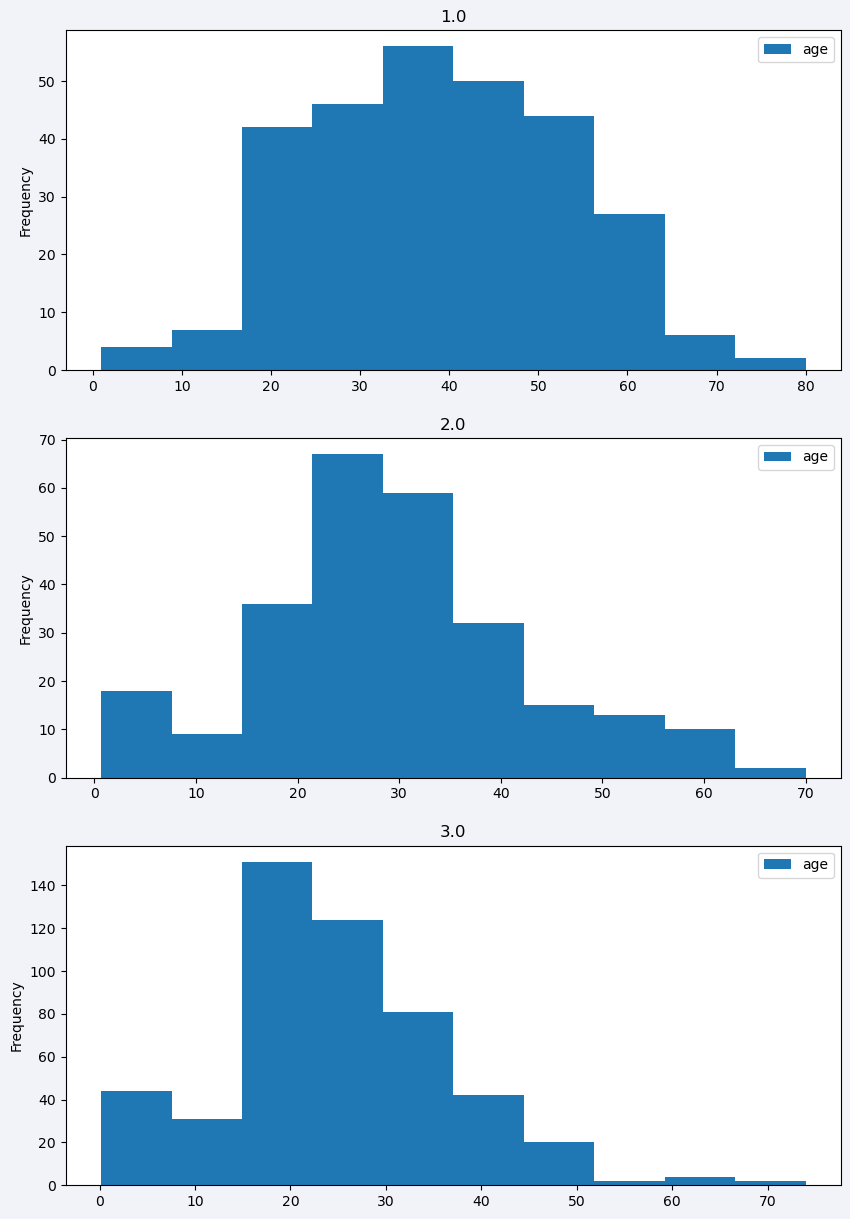

In [36]:
data_titanic.plot.hist(column=["age"], by="pclass", bins=10, figsize=(10, 15))

## Croisons un peu les variables !

### Quelle est la part de femmes ayant survécu ?

Regardons la table de contingence en effectifs :

In [37]:
total = data_titanic["sex"].value_counts().sum()

female_total = len(data_titanic[data_titanic["sex"] == "female"])
male_total = len(data_titanic[data_titanic["sex"] == "male"])

females_rate = female_total / total
males_rate = male_total / total

print(f"Of a total of 1309 passengers in Titanic, here were {female_total} females in the Titanic, representing {females_rate:.2%} of the total passengers, and \
{male_total} males, representing {males_rate:.2%} of the total passengers")

data_crosstab = pd.crosstab(data_titanic["survived"], 
							data_titanic["sex"], 
							margins=True) 
data_crosstab

Of a total of 1309 passengers in Titanic, here were 466 females in the Titanic, representing 35.60% of the total passengers, and 843 males, representing 64.40% of the total passengers


sex,female,male,All
survived,,,
0.0,127,682,809
1.0,339,161,500
All,466,843,1309


In [38]:
table_survie_sexe = pd.crosstab(data_titanic['sex'], data_titanic['survived'])
part_femmes_survecu = table_survie_sexe.loc['female', 1] / table_survie_sexe.loc['female'].sum() * 100
print(f"Part de femmes ayant survécu : {part_femmes_survecu:.2f}%")

Part de femmes ayant survécu : 72.75%


### Est-ce que les survivants sont plus des femmes ?

Regardons la table de contingence en proportion en fonction des colonnes

In [39]:
data_crosstab = pd.crosstab(data_titanic["survived"], 
							data_titanic["sex"], 
							margins=True, normalize="columns") 
data_crosstab

sex,female,male,All
survived,,,
0.0,0.272532,0.809015,0.618029
1.0,0.727468,0.190985,0.381971


72% of all the females survived, while only 19% of all the males survived.

In [40]:
table_survie_sexe_frequences = pd.crosstab(data_titanic['survived'],
                                           data_titanic['sex'],
                                           normalize='index')
table_survie_sexe_frequences

sex,female,male
survived,,
0.0,0.156984,0.843016
1.0,0.678000,0.322000


Of all the survivors, 67% were females and 32% were males

### Est-ce que les femmes sont plus nombreuses à avoir survécu que les hommes ?

Regardons la table de contingence en proportion en fonction des lignes

In [41]:
table_proportion_lignes = pd.crosstab(data_titanic["sex"], 
									  data_titanic["survived"], 
									  margins=True, normalize="index") 
table_proportion_lignes

survived,0.0,1.0
sex,,
female,0.272532,0.727468
male,0.809015,0.190985
All,0.618029,0.381971


In [42]:
femmes_survies = table_proportion_lignes.loc['female', 1] * 100
hommes_survies = table_proportion_lignes.loc['male', 1] * 100
print(f"Pourcentage de femmes ayant survécu : {femmes_survies:.2f}%")
print(f"Pourcentage d'hommes ayant survécu : {hommes_survies:.2f}%")

Pourcentage de femmes ayant survécu : 72.75%
Pourcentage d'hommes ayant survécu : 19.10%


### Comment sont représentés les âges par genre ?

Réalisons le résumé statistique par modalité :

In [43]:
median_age_by_class = data_titanic.groupby("sex")["age"].median().reset_index()
median_age_by_class.columns = ["sex", "median_age"]
median_age_by_class

,sex,median_age
0,female,27.0
1,male,28.0


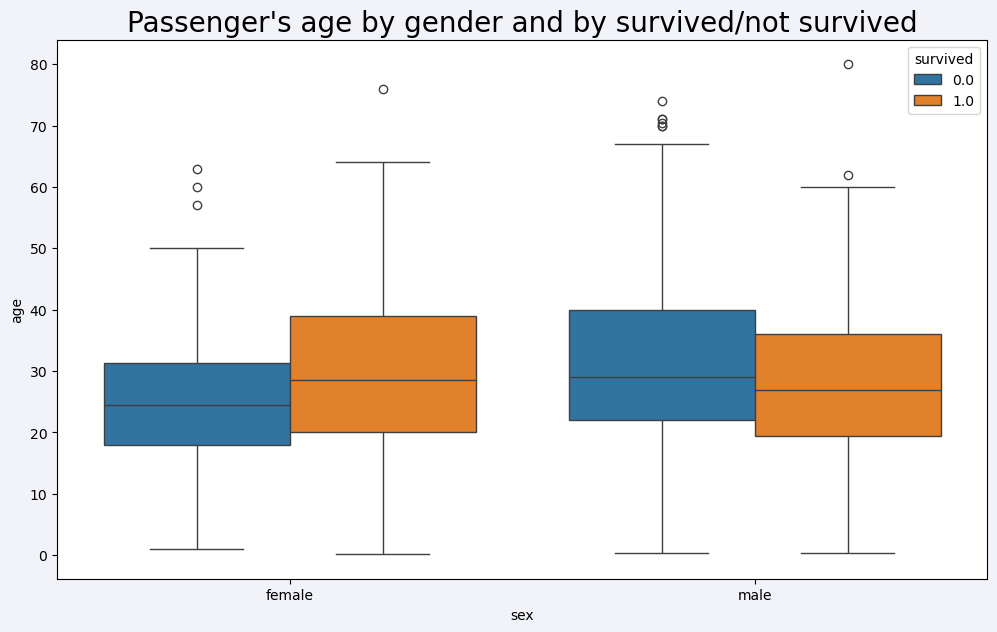

In [44]:
fig = plt.figure()

ax = fig.add_subplot()

sns.boxplot(data_titanic, x="sex", y="age", hue="survived", ax=ax)

ax.set_title("Passenger's age by gender and by survived/not survived", fontsize=20)

plt.show()

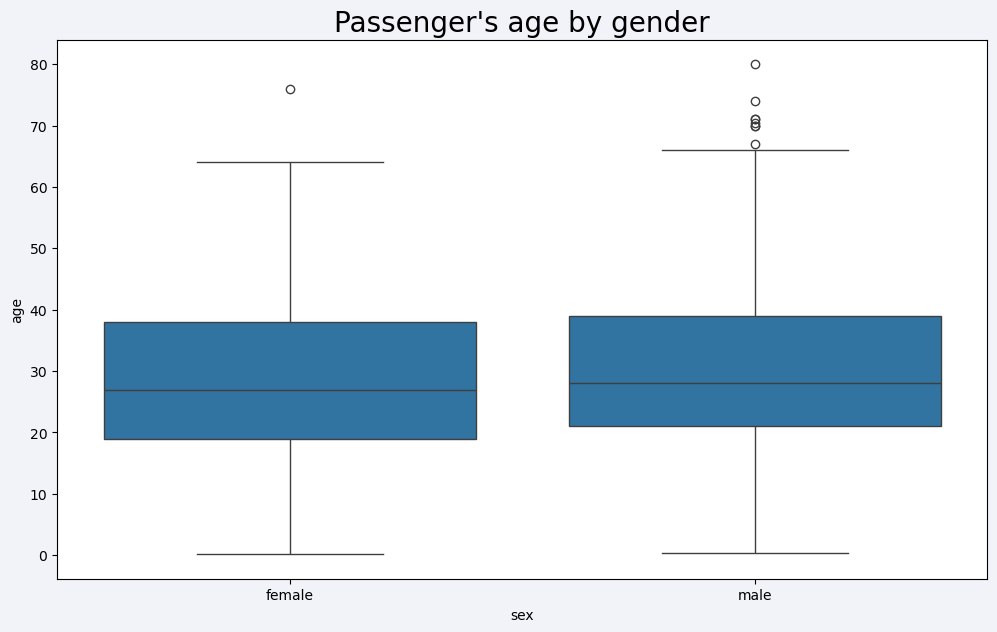

In [45]:
fig = plt.figure()

ax = fig.add_subplot()

sns.boxplot(data_titanic, x="sex", y="age", ax=ax)

ax.set_title("Passenger's age by gender", fontsize=20)

plt.show()

<Axes: xlabel='age', ylabel='Count'>

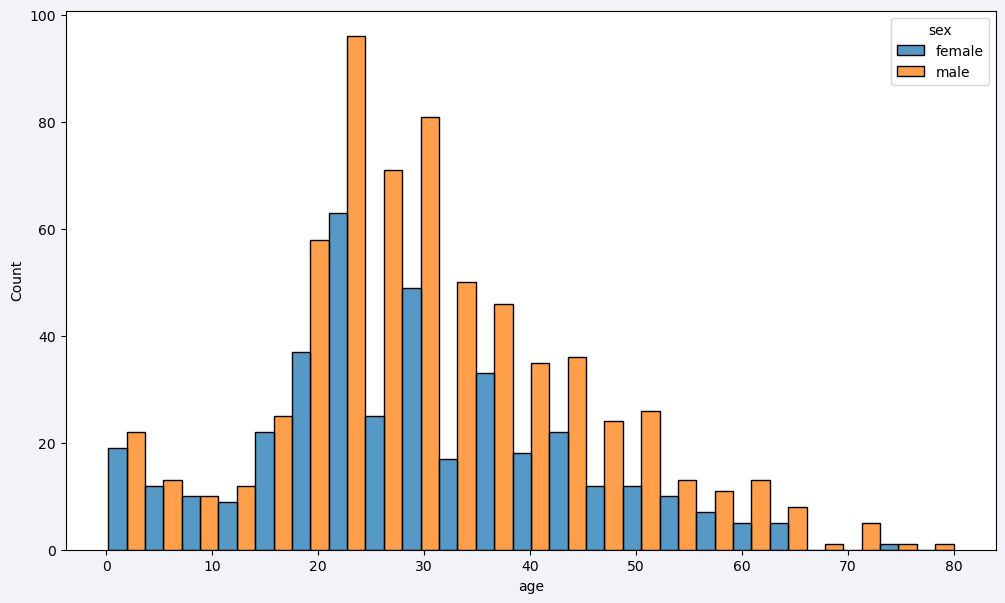

In [46]:
sns.histplot(data=data_titanic, x="age", hue="sex", multiple="dodge")

### Regardons ça en graphiques !

Avec le boxplot :

Avec la fonction de répartition empirique :

In [47]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   object 
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.3+ KB


In [48]:
median_age_by_class = data_titanic.groupby('pclass')['age'].median().reset_index()
median_age_by_class.columns = ['pclass', 'median_age']

for index, row in median_age_by_class.iterrows():
    class_value = row['pclass']
    median_age = row['median_age']
    data_titanic.loc[data_titanic['pclass'] == class_value, 'age'] = data_titanic.loc[data_titanic['pclass'] == class_value, 'age'].fillna(median_age)

res = stats.ecdf(data_titanic["age"])

res.cdf.quantiles

array([ 0.1667,  0.3333,  0.4167,  0.6667,  0.75  ,  0.8333,  0.9167,
        1.    ,  2.    ,  3.    ,  4.    ,  5.    ,  6.    ,  7.    ,
        8.    ,  9.    , 10.    , 11.    , 11.5   , 12.    , 13.    ,
       14.    , 14.5   , 15.    , 16.    , 17.    , 18.    , 18.5   ,
       19.    , 20.    , 20.5   , 21.    , 22.    , 22.5   , 23.    ,
       23.5   , 24.    , 24.5   , 25.    , 26.    , 26.5   , 27.    ,
       28.    , 28.5   , 29.    , 30.    , 30.5   , 31.    , 32.    ,
       32.5   , 33.    , 34.    , 34.5   , 35.    , 36.    , 36.5   ,
       37.    , 38.    , 38.5   , 39.    , 40.    , 40.5   , 41.    ,
       42.    , 43.    , 44.    , 45.    , 45.5   , 46.    , 47.    ,
       48.    , 49.    , 50.    , 51.    , 52.    , 53.    , 54.    ,
       55.    , 55.5   , 56.    , 57.    , 58.    , 59.    , 60.    ,
       60.5   , 61.    , 62.    , 63.    , 64.    , 65.    , 66.    ,
       67.    , 70.    , 70.5   , 71.    , 74.    , 76.    , 80.    ])

In [49]:
res.cdf.probabilities

array([7.63941940e-04, 1.52788388e-03, 2.29182582e-03, 3.05576776e-03,
       5.34759358e-03, 7.63941940e-03, 9.16730328e-03, 1.68067227e-02,
       2.59740260e-02, 3.13216196e-02, 3.89610390e-02, 4.27807487e-02,
       4.73644003e-02, 5.04201681e-02, 5.50038197e-02, 6.26432391e-02,
       6.56990069e-02, 6.87547746e-02, 6.95187166e-02, 7.18105424e-02,
       7.56302521e-02, 8.17417876e-02, 8.32696715e-02, 8.78533231e-02,
       1.02368220e-01, 1.17647059e-01, 1.47440794e-01, 1.49732620e-01,
       1.71886937e-01, 1.89457601e-01, 1.90221543e-01, 2.21543163e-01,
       2.54392666e-01, 2.55156608e-01, 2.75019099e-01, 2.75783040e-01,
       4.70588235e-01, 4.71352177e-01, 4.97326203e-01, 5.20244461e-01,
       5.21008403e-01, 5.43926662e-01, 5.68372804e-01, 5.70664629e-01,
       6.05805959e-01, 6.36363636e-01, 6.37891520e-01, 6.55462185e-01,
       6.73796791e-01, 6.76852559e-01, 6.92895340e-01, 7.05118411e-01,
       7.06646295e-01, 7.24216960e-01, 7.47899160e-01, 7.49427044e-01,
      

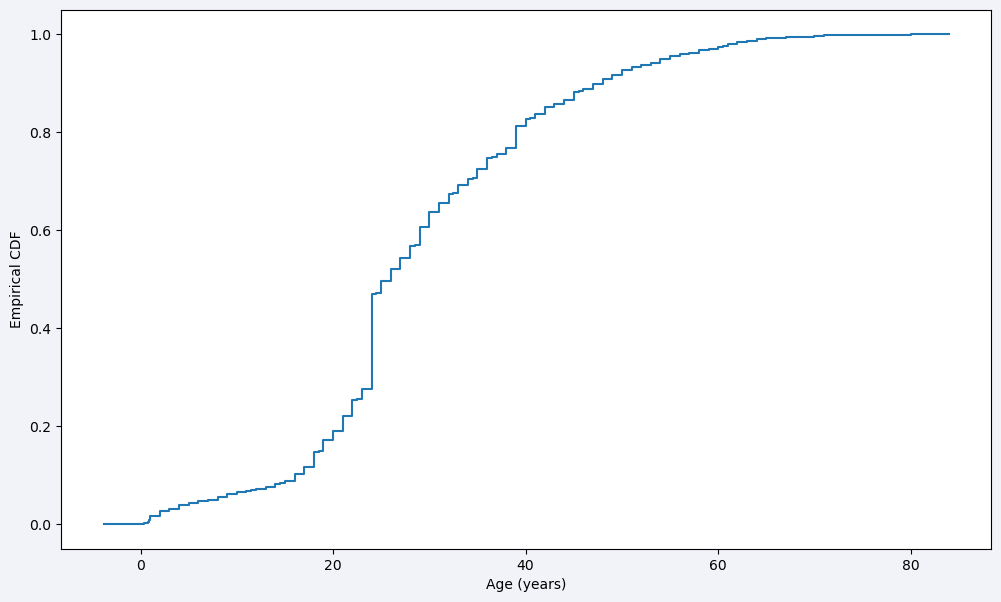

In [50]:
ax = plt.subplot()
res.cdf.plot(ax)
ax.set_xlabel('Age (years)')
ax.set_ylabel('Empirical CDF')
plt.show()

Separating male and female:

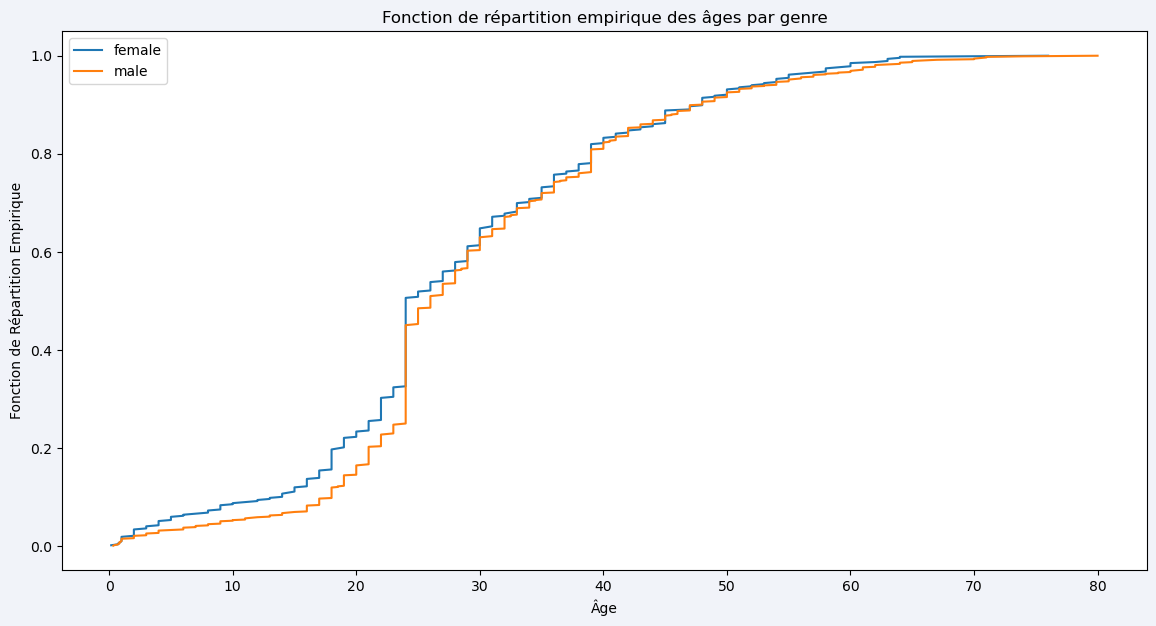

In [51]:
# Fonction de répartition empirique (ECDF) des âges par genre
plt.figure(figsize=(14, 7))

for sex in data_titanic['sex'].unique():
    ecdf = ECDF(data_titanic[data_titanic['sex'] == sex]['age'].dropna())
    plt.plot(ecdf.x, ecdf.y, label=sex)
plt.title("Fonction de répartition empirique des âges par genre")
plt.xlabel("Âge")
plt.ylabel("Fonction de Répartition Empirique")
plt.legend()
plt.show()

### Peut-on voir un lien entre l'âge et le prix du ticket ?

Regardons ça avec un scatter plot :

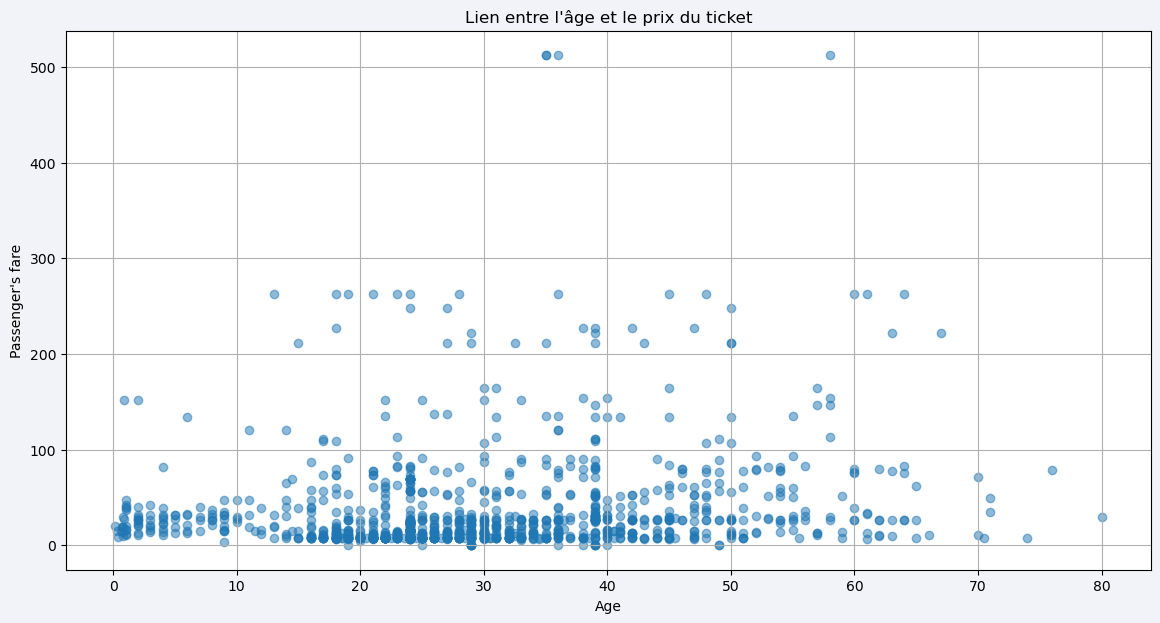

In [52]:
plt.figure(figsize=(14, 7))
plt.scatter(data_titanic['age'], data_titanic['fare'], alpha=0.5)
plt.title("Lien entre l'âge et le prix du ticket")
plt.xlabel("Age")
plt.ylabel("Passenger's fare")
plt.grid(True)
plt.show()

Regardons le coefficient de corrélation :

In [53]:
# Coefficient de corrélation de Pearson
corr_pearson = data_titanic[['age', 'fare']].corr(method='pearson').iloc[0, 1]
print(f"Coefficient de corrélation de Pearson : {corr_pearson:.3f}")

Coefficient de corrélation de Pearson : 0.203


Réalisons la matrice de corrélation en heatmap pour voir ça graphiquement :

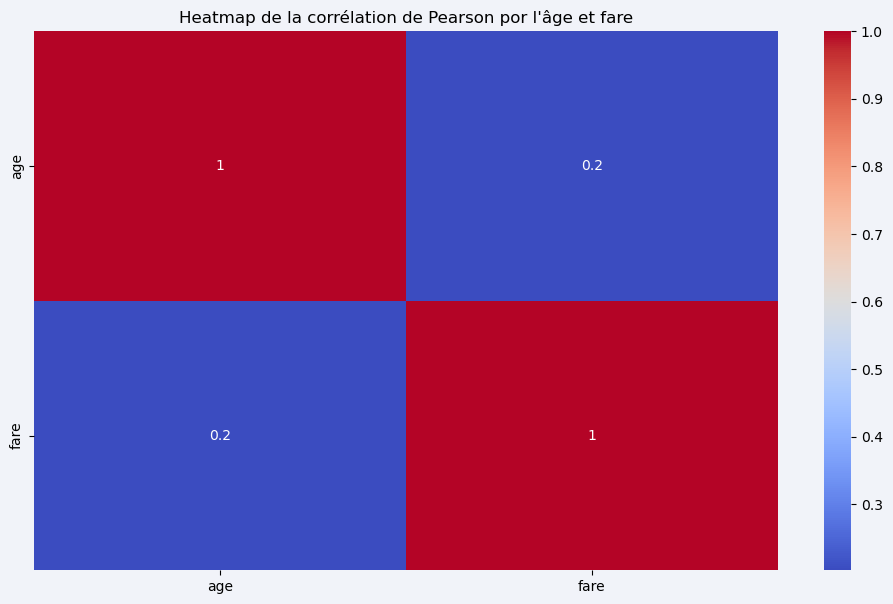

In [54]:
corr_pearson = data_titanic[['age', 'fare']].corr(method='pearson')

plt.figure()
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title("Heatmap de la corrélation de Pearson por l'âge et fare")
plt.show()

Par défaut, la fonction .corr() calcule la <b/>corrélation de Pearson</b>, adaptée lorsque la relation entre les deux variables est linéaire.<br/>
La <b/>corrélation de Spearman</b> quant à elle mesure la relation monotone entre deux variables en se basant sur les rangs des données. Elle est ainsi moins sensible aux outliers et permet de repérer des relations monotones non linéaires.<br/>

🌞 Ressource : https://datascientest.com/correlations-de-pearson-et-de-spearman <br/>

Calculer le coefficient de corrélation de Spearman et comparer le résultat.

In [55]:
# Coefficient de corrélation de Spearman
corr_spearman = data_titanic[['age', 'fare']].corr(method='spearman').iloc[0, 1]
print(f"Coefficient de corrélation de Spearman : {corr_spearman:.3f}")

Coefficient de corrélation de Spearman : 0.228


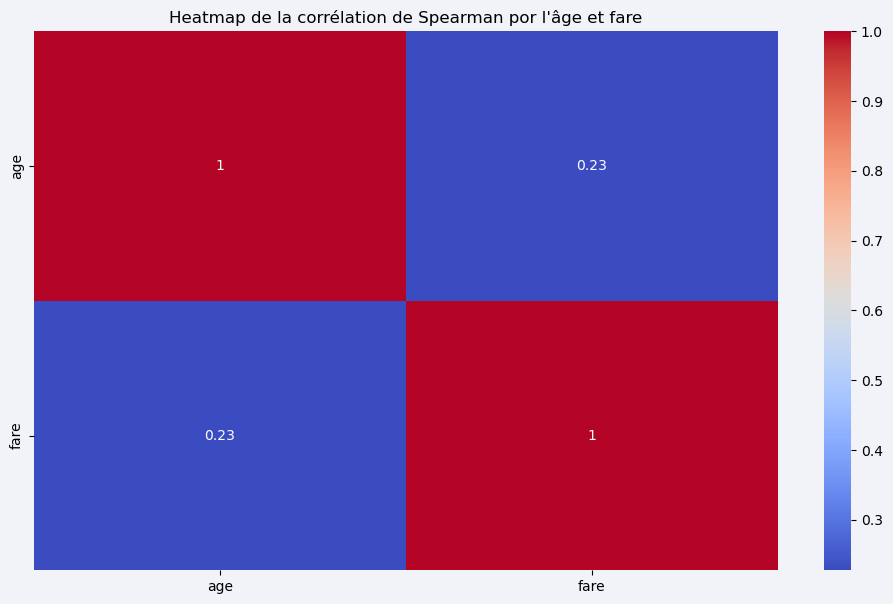

In [56]:
corr_spearman = data_titanic[['age', 'fare']].corr(method='spearman')

plt.figure()
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm')
plt.title("Heatmap de la corrélation de Spearman por l'âge et fare")
plt.show()

### Semble-t-il y avoir un lien entre la classe sociale et la survie ?

In [57]:
table_survie_classe = pd.crosstab(data_titanic['pclass'], data_titanic['survived'])
table_survie_classe

survived,0.0,1.0
pclass,,
1.0,123,200
2.0,158,119
3.0,528,181


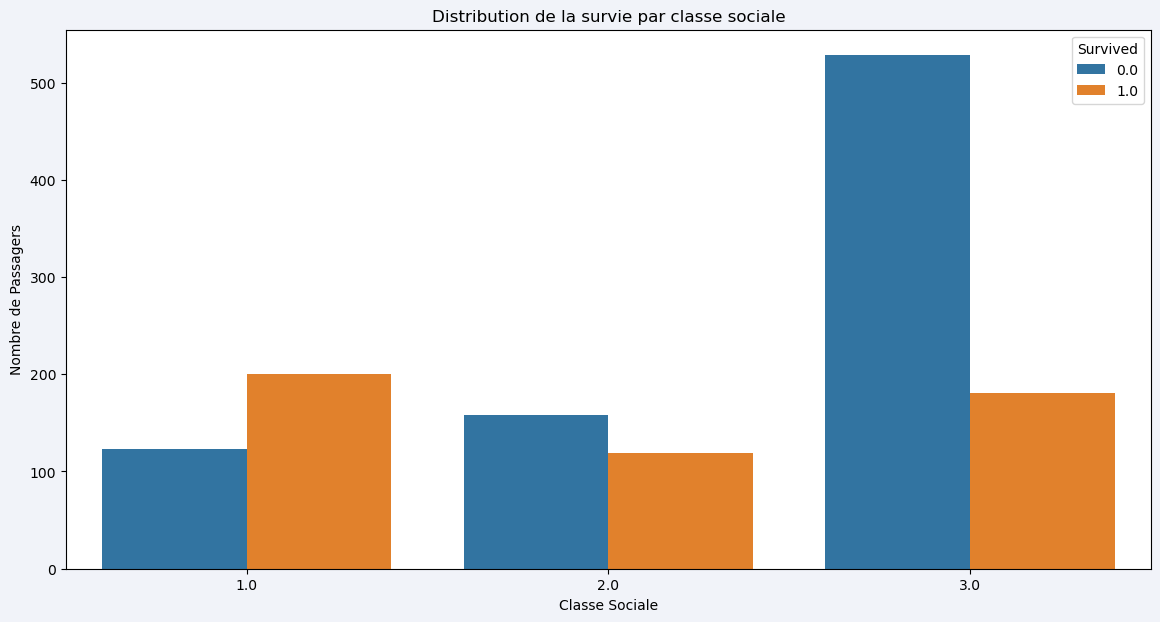

In [58]:
plt.figure(figsize=(14, 7))
sns.countplot(x='pclass', hue='survived', data=data_titanic)
plt.title("Distribution de la survie par classe sociale")
plt.xlabel("Classe Sociale")
plt.ylabel("Nombre de Passagers")
plt.legend(title='Survived')
plt.show()

### Continuez d'explorer ce qui vous semble intéressant !

## Tests statistiques

Nous avons pu voir plusieurs informations avec les analyses préliminaires réalisées :
- Les femmes semblent être plus nombreuses à survivre
- Les 1ère classes semblent avoir plus de chance de survivre que les 3ème classe
- ...

### Qu'est-ce qu'un test d'hypothèses ?

Quelques ressources :
- 🌞 https://www.youtube.com/watch?v=0oc49DyA3hU
- 🌞 https://www.youtube.com/watch?v=5koKb5B_YWo

Idée principale : vérifier que les statistiques de l'échantillon sont significatives, c'est à dire que si on reproduit l'expérience, on aurait les mêmes résultats (extrapolation à la population globale).

Autrement dit : à partir des conclusions faites sur un <b/>échantillon</b>, on veut voir si on peut les <b/>généraliser à l'ensemble de la population</b> dont est tiré cet échantillon.

Par exemple si on analyse un échantillon de personnes ayant un cancer en testant deux méthodes pour le soigner et qu'on trouve que la meilleure des solutions est de dormir 12h par nuit, on souhaite que nos statistiques sur cet échantillon soient valables pour toutes les personnes ayant un cancer afin d'être sûre que cette méthode peut être utilisée sur tout le monde.<br/>
<br/>

Il existe différents types de tests, notamment :
- les tests <b/>de conformité à une valeur</b> <i/>(ex : les paquets de farine de ma chaîne de production font-ils bien 500g ?)</i>
- les tests <b/>de comparaison entre des échantillons</b> <i/>(ex : est-ce que les fumeurs ont davantage de risque de cancer que les non fumeurs ?)</i>
- les tests <b/>d'adéquation / de conformité à une loi de probabilité</b> <i/>(ex : est-ce que la distribution des revenus suit une loi normale ?)</i>

Dans chacun des cas, on utilisera une formule spécifique à ce type de test (une fonction différente sur Python).

🌚 Ressource pour plus tard : guide de choix de test statistique - https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use

Commençons par les tests de comparaison de deux moyennes.

### Les femmes ont-elles en moyenne significativement plus de chance de survie que les hommes ?

Ou la répartition est-elle due au hasard ?

Peut-être que vous vous demandez : ça se voit avec les effectifs, pourquoi le vérifier statistiquement ?

L'idée des tests d'hypothèses est d'extrapoler ce qu'on voit sur un échantillon à la population globale. Dans notre cas, c'est comme si on voulait vérifier si à l'époque la survie des femmes sur les bâteaux qui rencontrent des icebergs est toujours supérieure à celle des hommes. Pour cela on prend notre échantillon du Titanic en référence.

De la même manière, vous avez peut-être déjà entendu parlé de ça en politique pendant les élections, on peut prendre un village qui aurait les mêmes proportions de femmes, de jeunes, d'artisans,... que la France entière (= échantillon) afin d'extrapoler leurs intentions de vote au niveau national.

**Réalisons notre premier test statistique pas à pas !**

Commençons par réaliser les sous-échantillons d'hommes et de femmes :

In [59]:
survie_femmes = data_titanic[data_titanic['sex'] == 'female']['survived'].dropna()
survie_hommes = data_titanic[data_titanic['sex'] == 'male']['survived'].dropna()

Calculons la moyenne des échantillons pour vérifier que notre hypothèse est plausible :

In [60]:
moyenne_survie_femmes = survie_femmes.mean()
moyenne_survie_hommes = survie_hommes.mean()

print(f"The mean of survival rate for females is {moyenne_survie_femmes:.2f} and for males is {moyenne_survie_hommes:.2f}")

The mean of survival rate for females is 0.73 and for males is 0.19


Réalisons un premier test afin de voir si les deux moyennes sont statistiquement significativement différentes :

Quelques petites informations intéressantes, prenez le temps d'y jeter un coup d'oeil :
- Documentation Python :
    - Test sur une moyenne : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
    - Test de comparaison de 2 moyennes : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
    - Test sur une proportion : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html
    - 🌚 Tous les tests d'hypothèse sur Python : https://docs.scipy.org/doc/scipy/reference/stats.html#hypothesis-tests-and-related-functions <br/>
<br/>
- 🌞 Les étapes de la réalisation d'un test d'hypothèses : https://www.youtube.com/watch?v=I3vnzM1X15g&list=PLWwpP-YNkDjYa9PTCOwJ0A6LNtvbjThsf&index=1

A noter que dans la plupart des cas (notamment quand ce n'est pas précisé), on prendra à une pvaleur à 5%

On pose nos hypothèses H0 et H1 :

Null hypothese:

- H_0: There is no significant difference in the survival rate between women and men (the means are equal)
- H_0​: Il n'y a pas de différence significative entre les taux de survie des femmes et des hommes (les moyennes sont égales).

Alternative hypothese:

- H_1: There is significative difference in the survival rate between men and women (means are different) 
- H_1​: Il existe une différence significative entre les taux de survie des femmes et des hommes (les moyennes sont différentes).

On réalise notre test :

In [61]:
std_survie_femmes = survie_femmes.std()
std_survie_hommes = survie_hommes.std()

print(f"std for females is {std_survie_femmes:.2f} and for males is {std_survie_hommes:.2f}")

std for females is 0.45 and for males is 0.39


In [62]:
survie_femmes_array = np.asarray(survie_femmes, dtype=float)
survie_hommes_array = np.asarray(survie_hommes, dtype=float)

t_stat, p_value = ttest_ind(survie_femmes_array, survie_hommes_array, equal_var=False)

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

Statistique t : 21.72
P-value : 0.0000


In [63]:
alpha = 0.05
if p_value < alpha:
    print("Les femmes ont en moyenne significativement plus de chance de survie que les hommes (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des femmes et des hommes (ne pas rejeter H0).")

Les femmes ont en moyenne significativement plus de chance de survie que les hommes (rejeter H0).


On peut refaire le test en vérifiant que la moyenne de survie des femmes est supérieure à celle des hommes :

In [64]:
survie_femmes_array = np.asarray(survie_femmes, dtype=float)
survie_hommes_array = np.asarray(survie_hommes, dtype=float)

t_stat, p_value = ttest_ind(survie_femmes_array, survie_hommes_array,
                            alternative="greater", equal_var=False)

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

Statistique t : 21.72
P-value : 0.0000


In [65]:
alpha = 0.05
if p_value < alpha:
    print("Les femmes ont en moyenne significativement plus de chance de survie que les hommes (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des femmes et des hommes (ne pas rejeter H0).")

Les femmes ont en moyenne significativement plus de chance de survie que les hommes (rejeter H0).


Conclusion :

### Focus pvalue + intervalle de confiance

Quelques ressources pour bien comprendre la notion de pvaleur :
- https://fr.wikipedia.org/wiki/Valeur_p
- 🌞 https://www.youtube.com/watch?v=vemZtEM63GY
- 🌞 https://www.youtube.com/watch?v=xVIt51ybvu0
- 🌚 https://www.youtube.com/watch?v=jy9b1HSqtSk

Quelques ressources pour bien comprendre la notion d'intervalle de confiance :
- https://fr.wikipedia.org/wiki/Intervalle_de_confiance
- 🌞 https://www.youtube.com/watch?v=TqOeMYtOc1w
- 🌚 simulateur pour aider à la compréhension : https://im2ag-shiny.univ-grenoble-alpes.fr/fcorset/ICmu/

### COMPETENCE - Les 3ème classe ont-il moins de chance de survie que les 1ère classe ?

Nous formulons nos hypothèses:

Null hypothese:

- H_0: There is no significant difference in the survival rate between classes 1 and 3 (the means are equal)
- H_0​: Il n'y a pas de différence significative entre les taux de survie entre les 1ère classe et les 3ème classe (les moyennes sont égales).

Alternative hypothese:

- H_1: There is significative difference in the survival rate between classes 1 and 3 (means are different) 
- H_1​: Il existe une différence significative entre les taux de survie entre les 1ère classe et les 3ème classe (les moyennes sont différentes).

In [66]:
survie_1ere = data_titanic[data_titanic["pclass"] == 1]['survived'].dropna()
survie_3eme = data_titanic[data_titanic["pclass"] == 3]['survived'].dropna()

moyenne_survie_1ere = survie_1ere.mean()
moyenne_survie_3eme = survie_3eme.mean()

std_survie_1ere = survie_1ere.std()
std_survie_3eme = survie_3eme.std()

print(f"The mean of survival rate for 1ère classe is {moyenne_survie_1ere:.2f} and for the 3ème is {moyenne_survie_3eme:.2f}")
print(f"The std of survival rate for 1ère classe is {std_survie_1ere:.2f} and for the 3ème is {std_survie_3eme:.2f}")

The mean of survival rate for 1ère classe is 0.62 and for the 3ème is 0.26
The std of survival rate for 1ère classe is 0.49 and for the 3ème is 0.44


In [67]:
survie_1ere_array = np.asarray(survie_1ere, dtype=float)
survie_3eme_array = np.asarray(survie_3eme, dtype=float)

t_stat, p_value = ttest_ind(survie_1ere_array, survie_3eme_array, equal_var=False)

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 3ème classe ont en moyenne significativement moins de chance de survie que les 1ère (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 3ème e les 1ère classes (ne pas rejeter H0).")

Statistique t : 11.50
P-value : 0.0000
Les 3ème classe ont en moyenne significativement moins de chance de survie que les 1ère (rejeter H0).


In [68]:
survie_1ere_array = np.asarray(survie_1ere, dtype=float)
survie_3eme_array = np.asarray(survie_3eme, dtype=float)

t_stat, p_value = ttest_ind(survie_1ere_array, survie_3eme_array,
                            alternative="greater", equal_var=False)

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 3ème classe ont en moyenne significativement moins de chance de survie que les 1ère (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 3ème e les 1ère classes (ne pas rejeter H0).")

Statistique t : 11.50
P-value : 0.0000
Les 3ème classe ont en moyenne significativement moins de chance de survie que les 1ère (rejeter H0).


##### Qu'en est-il des 2nde classe ?

Nous formulons nos hypothèses:

Null hypothese:

- H_0: There is no significant difference in the survival rate between classes 2 and the others (the means are equal)
- H_0​: Il n'y a pas de différence significative entre les taux de survie entre les 2ème classe et les autres deux (les moyennes sont égales).

Alternative hypothese:

- H_1: There is significative difference in the survival rate between classes 2 and the others (means are different) 
- H_1​: Il existe une différence significative entre les taux de survie entre les 2ème classe et les autres deux (les moyennes sont différentes).

In [69]:
survie_autres = data_titanic[data_titanic["pclass"] != 2]['survived'].dropna()
survie_2eme = data_titanic[data_titanic["pclass"] == 2]['survived'].dropna()

moyenne_survie_autres = survie_autres.mean()
moyenne_survie_2eme = survie_2eme.mean()

std_survie_autres = survie_autres.std()
std_survie_2eme = survie_2eme.std()

print(f"The mean of survival rate for 2ème classe is {moyenne_survie_2eme:.2f} and for the others is {moyenne_survie_autres:.2f}")
print(f"The std of survival rate for 2ème classe is {std_survie_2eme:.2f} and for the others is {std_survie_autres:.2f}")

survie_autres_array = np.asarray(survie_autres, dtype=float)
survie_2eme_array = np.asarray(survie_2eme, dtype=float)

print("###############################################")

t_stat, p_value = ttest_ind(survie_autres_array, survie_2eme_array, equal_var=False)

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 2ème classe ont en moyenne significativement moins de chance de survie que les autres deux (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).")

print("###############################################")

t_stat, p_value = ttest_ind(survie_autres_array, survie_2eme_array, equal_var=False, alternative="greater")

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 2ème classe ont en moyenne significativement moins de chance de survie que les autres deux (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).")

print("###############################################")

t_stat, p_value = ttest_ind(survie_2eme_array, survie_autres_array, equal_var=False, alternative="less")

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 2ème classe ont en moyenne significativement moins de chance de survie que les autres deux (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).")

The mean of survival rate for 2ème classe is 0.43 and for the others is 0.37
The std of survival rate for 2ème classe is 0.50 and for the others is 0.48
###############################################
Statistique t : -1.81
P-value : 0.0709
Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).
###############################################
Statistique t : -1.81
P-value : 0.9645
Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).
###############################################
Statistique t : 1.81
P-value : 0.9645
Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).


In [70]:
survie_all = data_titanic["survived"].dropna()
survie_2eme = data_titanic[data_titanic["pclass"] == 2]['survived'].dropna()

moyenne_survie_all = survie_all.mean()
moyenne_survie_2eme = survie_2eme.mean()

std_survie_all = survie_all.std()
std_survie_2eme = survie_2eme.std()

print(f"The mean of survival rate for 2ème classe is {moyenne_survie_2eme:.2f} and for the others is {moyenne_survie_all:.2f}")
print(f"The std of survival rate for 2ème classe is {std_survie_2eme:.2f} and for the others is {std_survie_all:.2f}")

survie_all_array = np.asarray(survie_all, dtype=float)
survie_2eme_array = np.asarray(survie_2eme, dtype=float)

print("###############################################")

t_stat, p_value = ttest_1samp(survie_2eme_array, moyenne_survie_all)

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 2ème classe ont en moyenne significativement moins de chance de survie que les autres deux (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).")

print("###############################################")

t_stat, p_value = ttest_1samp(survie_2eme_array, moyenne_survie_all, alternative="greater")

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 2ème classe ont en moyenne significativement plus de chance de survie que les autres deux (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).")

print("###############################################")

t_stat, p_value = ttest_1samp(survie_2eme_array, moyenne_survie_all, alternative="less")

print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Les 2ème classe ont en moyenne significativement moins de chance de survie que les autres deux (rejeter H0).")
else:
    print("Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).")

The mean of survival rate for 2ème classe is 0.43 and for the others is 0.38
The std of survival rate for 2ème classe is 0.50 and for the others is 0.49
###############################################
Statistique t : 1.60
P-value : 0.1111
Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).
###############################################
Statistique t : 1.60
P-value : 0.0555
Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).
###############################################
Statistique t : 1.60
P-value : 0.9445
Il n'y a pas de différence significative entre les chances de survie des 2ème e les autres deux (ne pas rejeter H0).


### Les chances de survie des mineurs étaient-elles supérieures à 50% ?

Nous formulons nos hypothèses:

- Hypothèse nulle (H_0​) : Les mineurs ont une probabilité de survie de 50% ou moins.

- Hypothèse alternative (H_1​) : Les mineurs ont une probabilité de survie supérieure à 50%.

Identifier le type de test à réaliser parmi ceux cités plus haut.

The appropriate test is the Binomial test: a test for chances, thqt is, the probability of success in a sample of size n after k trials. In this case, we are testing the probability of surviving (success) for minors in a sample of size "total number of < 18 years" after k have survived (trials).

In [71]:
mineurs = data_titanic[data_titanic['age'] < 18]['survived']

n_survives = int(mineurs.sum())
n_total = mineurs.count()

In [72]:
mineurs.value_counts()

survived
1.0    81
0.0    73
Name: count, dtype: int64

In [73]:
result = binomtest(n_survives, n_total, p=0.5, alternative='greater')

print(f"Nombre de mineurs survivants : {n_survives}/{n_total}")
print(result)
print(f"P-value : {result.pvalue}")

Nombre de mineurs survivants : 81/154
BinomTestResult(k=81, n=154, alternative='greater', statistic=0.525974025974026, pvalue=0.286422984499854)
P-value : 0.286422984499854


In [74]:
alpha = 0.05

if result.pvalue < alpha:
    print("Les chances de survie des mineurs étaient supérieures à 50% (rejeter H0).")
else:
    print("Il n'y a pas de preuve suffisante pour dire que les chances de survie des mineurs étaient supérieures à 50% (ne pas rejeter H0).")

Il n'y a pas de preuve suffisante pour dire que les chances de survie des mineurs étaient supérieures à 50% (ne pas rejeter H0).


### Le genre et la survie sont-elles deux variables indépendantes ?

Une autre manière d'aborder la question de la survie selon le genre est de réaliser un test d'indépendance du Khi-deux.<br/>
<br/>
🌞 Ressources :
- Pour expliquer ce test : https://datatab.fr/tutorial/chi-square-test
- Test du Khi-deux d'indépendance sur Python : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

Nous formulons nos hypothèses:

- Hypothèse nulle (H_0​) : Il n'y a pas de relation entre le genre et la survie (les variables sont indépendantes).
- Hypothèse alternative (H_1​) : Il existe une relation entre le genre et la survie (les variables ne sont pas indépendantes).

In [76]:
table_proportion_lignes2 = pd.crosstab(data_titanic["sex"], 
									   data_titanic["survived"], 
									  )
table_proportion_lignes2

survived,0.0,1.0
sex,,
female,127,339
male,682,161


In [77]:
# Test du Khi-deux
chi2, pvalue, dof, expected = chi2_contingency(table_proportion_lignes2)

print(f"Statistique Khi-deux : {chi2:.2f}")
print(f"P-value : {pvalue:.4f}")
print(f"Degrés de liberté : {dof}")
print("Tableau des effectifs attendus sous H0 :\n", expected)

Statistique Khi-deux : 363.62
P-value : 0.0000
Degrés de liberté : 1
Tableau des effectifs attendus sous H0 :
 [[288.00152788 177.99847212]
 [520.99847212 322.00152788]]


In [78]:
alpha = 0.05

if pvalue < alpha:
    print("Il y a une relation significative entre le genre et la survie (rejeter H0).")
else:
    print("Il n'y a pas de relation significative entre le genre et la survie (ne pas rejeter H0).")

Il y a une relation significative entre le genre et la survie (rejeter H0).


### COMPETENCE - Y a-t-il un lien entre le genre et la classe ?

### Continuez d'explorer ce qui vous semble intéressant !

# Petite pause avec le paradoxe de Simpson

🌞 https://www.youtube.com/watch?v=vs_Zzf_vL2I

# Sujet 2 : Enquête sur le bonheur

Des étudiants en Master 1 Sciences Des Données à l'Université Grenoble Alpes ont réalisée une étude sur le bonheur lors d'un de leurs projets tutorés en 2020

Importez les données :

In [188]:
data_path = Path().resolve().parent / "data"

bonheur_data = pd.read_csv(data_path/"enquete_sur_le_bonheur.csv", delimiter=";")
bonheur_data.head(5)

,Timestamp,Quel est votre sexe ?,Quel est votre âge ? (Ex : 30 pour 30 ans),Dans quel département habitez-vous ? (Ex : 38 pour l'Isère / 0 si hors France),Etes vous heureux ?,Accordez-vous de l'importance à ... ? (Cochez si oui),Vous épanouissez-vous dans votre travail ?,Accordez-vous de l'importance à l'argent ?,Etes-vous plutôt ville ou nature ?,Accordez-vous de l'importance à votre temps personnel ?,Accordez-vous de l'importance aux activités sportives ?,Accordez-vous de l'importance aux activités créatives ?,Prenez-vous soin de votre santé ?,Accordez-vous de l'importance à votre développement personnel ?,Quel était votre rêve d'enfant ?,"Si vous fermez les yeux et imaginez un endroit où vous vous sentez bien, comment le décririez-vous ?",Que faites vous qui vous rende heureux pendant votre temps personnel ?,Qu'est ce qui vous rend heureux au quotidien ?,Quel est votre but dans la vie ?,Qu'est-ce qu'être heureux selon vous ?
0,9/29/2020 18:16:11,Femme,24,38,3,"Votre famille, Vos amis, Vos relations amoureu...",3.0,2,5,5,2,5,2,5,Je rêvais d'être artiste et d'avoir plein d'an...,"C'est une vaste plaine, avec énormément de fle...","Des créations artistiques (bijoux, dessins, br...",Savoir que les personnes qui m'entourent vont ...,"Être heureux, trouver le bonheur.","Être dans un bon état d'esprit, sans angoissé ..."
1,9/29/2020 18:19:18,Femme,22,38,4,"Votre famille, Vos amis, Vos relations amoureu...",3.0,5,4,5,2,1,3,2,Je n'avais pas de rêve quand j'étais enfant.,"Un endroit ni calme, ni bruyant, confortableme...","Manger, ou dormir.","Les petits plaisirs de la vie, la colloc, la f...","Je n'en ai pas spécialement, avoir les bonnes ...","Pour moi, c'est être satisfait de soi-même, de..."
2,9/29/2020 18:26:09,Femme,24,38,4,"Votre famille, Vos amis, Vos relations amoureu...",5.0,3,4,2,4,5,5,2,Je revaiq de devenir fermière et d'élever des ...,Une table de Noël avec toute ma famille et les...,Je prend soin de moi,Etre avec les gens que j'aime,Fonder une famille plein d'amour,"Etre bien dans sa peau, dans sa vie. Et être e..."
3,9/29/2020 18:28:35,Femme,30,1,4,"Votre famille, Vos amis, Vos relations amoureuses",4.0,5,4,3,2,4,4,2,Avoir des enfants,"Dans la nature, surtout près de l'eau",Prendre du temps pour moi,"Ma maison, mes chats, mon chéri",Être pleinement épanouie entre ma vie perso (u...,"Accomplir son objectif de vie, faire ce qui no..."
4,9/29/2020 18:30:32,Homme,33,77,4,"Votre famille, Vos amis, Vos relations amoureuses",3.0,5,1,5,3,3,3,3,devenir footballeur,Avec ma famille dans un parc,Me reposer,Manger et se reposer,Que ma famille ne manque de rien,Avoir la paix intérieure


Regardez globalement ce qu'il y a dedans:

In [190]:
bonheur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 20 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Timestamp                                                                                             423 non-null    object 
 1   Quel est votre sexe ?                                                                                 423 non-null    object 
 2   Quel est votre âge ? (Ex : 30 pour 30 ans)                                                            423 non-null    int64  
 3   Dans quel département habitez-vous ? (Ex : 38 pour l'Isère / 0 si hors France)                        423 non-null    int64  
 4   Etes vous heureux ?                                                                                   42

In [191]:
columns_to_drop = ["Timestamp"]

bonheur_data.drop(columns_to_drop, axis=1, inplace=True)

In [192]:
bonheur_df = bonheur_data.copy()

rename_dict = {
    "Quel est votre sexe ?": "sexe",
    "Quel est votre âge ? (Ex : 30 pour 30 ans)": "age",
    "Dans quel département habitez-vous ? (Ex : 38 pour l'Isère / 0 si hors France)": "departement",
    "Etes vous heureux ?": "etes_vous_heureux",
    "Accordez-vous de l'importance à ... ? (Cochez si oui)": "importance_a",
    "Vous épanouissez-vous dans votre travail ?": "s_epanouit_au_travail",
    "Accordez-vous de l'importance à l'argent ?": "importance_a_argent",
    "Etes-vous plutôt ville ou nature ?": "ville_ou_nature",
    "Accordez-vous de l'importance à votre temps personnel ?": "importance_temps_personnel",
    "Accordez-vous de l'importance aux activités sportives ?": "importance_activites_sportives",
    "Accordez-vous de l'importance aux activités créatives ?": "importance_activites_creatives",
    "Prenez-vous soin de votre santé ?": "prenez_soin_sante",
    "Accordez-vous de l'importance à votre développement personnel ?": "importance_dev_personnel",
    "Quel était votre rêve d'enfant ?": "reve_d_enfant",
    "Si vous fermez les yeux et imaginez un endroit où vous vous sentez bien, comment le décririez-vous ?": "endroit_img",
    "Que faites vous qui vous rende heureux pendant votre temps personnel ?": "faites_temp_person",
    "Qu'est ce qui vous rend heureux au quotidien ?": "rend_heureux_quotdn",
    "Quel est votre but dans la vie ?": "but_dans_la_vie",
    "Qu'est-ce qu'être heureux selon vous ?": "qqc_etre_heureux"
}

bonheur_df.rename(rename_dict, axis=1, inplace=True)
bonheur_df.head()

,sexe,age,departement,etes_vous_heureux,importance_a,s_epanouit_au_travail,importance_a_argent,ville_ou_nature,importance_temps_personnel,importance_activites_sportives,importance_activites_creatives,prenez_soin_sante,importance_dev_personnel,reve_d_enfant,endroit_img,faites_temp_person,rend_heureux_quotdn,but_dans_la_vie,qqc_etre_heureux
0,Femme,24,38,3,"Votre famille, Vos amis, Vos relations amoureu...",3.0,2,5,5,2,5,2,5,Je rêvais d'être artiste et d'avoir plein d'an...,"C'est une vaste plaine, avec énormément de fle...","Des créations artistiques (bijoux, dessins, br...",Savoir que les personnes qui m'entourent vont ...,"Être heureux, trouver le bonheur.","Être dans un bon état d'esprit, sans angoissé ..."
1,Femme,22,38,4,"Votre famille, Vos amis, Vos relations amoureu...",3.0,5,4,5,2,1,3,2,Je n'avais pas de rêve quand j'étais enfant.,"Un endroit ni calme, ni bruyant, confortableme...","Manger, ou dormir.","Les petits plaisirs de la vie, la colloc, la f...","Je n'en ai pas spécialement, avoir les bonnes ...","Pour moi, c'est être satisfait de soi-même, de..."
2,Femme,24,38,4,"Votre famille, Vos amis, Vos relations amoureu...",5.0,3,4,2,4,5,5,2,Je revaiq de devenir fermière et d'élever des ...,Une table de Noël avec toute ma famille et les...,Je prend soin de moi,Etre avec les gens que j'aime,Fonder une famille plein d'amour,"Etre bien dans sa peau, dans sa vie. Et être e..."
3,Femme,30,1,4,"Votre famille, Vos amis, Vos relations amoureuses",4.0,5,4,3,2,4,4,2,Avoir des enfants,"Dans la nature, surtout près de l'eau",Prendre du temps pour moi,"Ma maison, mes chats, mon chéri",Être pleinement épanouie entre ma vie perso (u...,"Accomplir son objectif de vie, faire ce qui no..."
4,Homme,33,77,4,"Votre famille, Vos amis, Vos relations amoureuses",3.0,5,1,5,3,3,3,3,devenir footballeur,Avec ma famille dans un parc,Me reposer,Manger et se reposer,Que ma famille ne manque de rien,Avoir la paix intérieure


In [193]:
bonheur_df["importance_a"].value_counts()

importance_a
Votre famille, Vos amis, Vos relations amoureuses, Vos relations sociales de manière générale    213
Votre famille, Vos amis, Vos relations amoureuses                                                 51
Votre famille, Vos amis                                                                           37
Votre famille, Vos amis, Vos relations sociales de manière générale                               36
Vos relations sociales de manière générale                                                        19
Votre famille, Vos relations amoureuses                                                           17
Vos amis, Vos relations amoureuses, Vos relations sociales de manière générale                     9
Votre famille                                                                                      8
Votre famille, Vos relations sociales de manière générale                                          7
Vos amis, Vos relations sociales de manière générale                          

In [232]:
unique_components = set()

for val in bonheur_df["importance_a"].dropna():
    components = [x.strip() for x in val.split(",")]
    unique_components.update(components)

for component in unique_components:
    bonheur_df[component] = bonheur_df["importance_a"].apply(lambda x: 1 if component in str(x) else 0)

rename_dict = {
    "Votre famille": "imptce_a_famille",
    "Vos amis": "imptce_a_amis",
    "Vos relations sociales de manière générale": "imptce_a_rel_soci_gen",
    "Vos relations amoureuses": "imptce_a_rel_amours"
}

bonheur_df.rename(rename_dict, axis=1, inplace=True)
bonheur_df.head()

,sexe,age,departement,etes_vous_heureux,importance_a,s_epanouit_au_travail,importance_a_argent,ville_ou_nature,importance_temps_personnel,importance_activites_sportives,...,qqc_etre_heureux,imptce_a_famille,imptce_a_amis,imptce_a_rel_soci_gen,imptce_a_rel_amours,age_interval,imptce_a_famille,imptce_a_amis,imptce_a_rel_soci_gen,imptce_a_rel_amours
0,Femme,24,38,3,"Votre famille, Vos amis, Vos relations amoureu...",3.0,2,5,5,2,...,"Être dans un bon état d'esprit, sans angoissé ...",1,1,1,1,"[20,30[",1,1,1,1
1,Femme,22,38,4,"Votre famille, Vos amis, Vos relations amoureu...",3.0,5,4,5,2,...,"Pour moi, c'est être satisfait de soi-même, de...",1,1,1,1,"[20,30[",1,1,1,1
2,Femme,24,38,4,"Votre famille, Vos amis, Vos relations amoureu...",5.0,3,4,2,4,...,"Etre bien dans sa peau, dans sa vie. Et être e...",1,1,1,1,"[20,30[",1,1,1,1
3,Femme,30,1,4,"Votre famille, Vos amis, Vos relations amoureuses",4.0,5,4,3,2,...,"Accomplir son objectif de vie, faire ce qui no...",1,1,0,1,"[30,40[",1,1,0,1
4,Homme,33,77,4,"Votre famille, Vos amis, Vos relations amoureuses",3.0,5,1,5,3,...,Avoir la paix intérieure,1,1,0,1,"[30,40[",1,1,0,1


In [195]:
df = pd.DataFrame({
    'age': [1,20,30,31,50,60,61,80,90] #np.random.randint(1,100,50)
})

def get_num_people_by_age_category(df):
    df["age_interval"] = pd.cut(
                x=df["age"],
                bins=[0,20,30,40,50,60, np.inf],
                labels=["<20", "[20,30[", "[30,40[", "[40,50[", "[50,60[", ">60"],
                right=False)
    return df

bonheur_df = get_num_people_by_age_category(bonheur_df)

In [196]:
bonheur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   sexe                            423 non-null    object  
 1   age                             423 non-null    int64   
 2   departement                     423 non-null    int64   
 3   etes_vous_heureux               423 non-null    int64   
 4   importance_a                    423 non-null    object  
 5   s_epanouit_au_travail           414 non-null    float64 
 6   importance_a_argent             423 non-null    int64   
 7   ville_ou_nature                 423 non-null    int64   
 8   importance_temps_personnel      423 non-null    int64   
 9   importance_activites_sportives  423 non-null    int64   
 10  importance_activites_creatives  423 non-null    int64   
 11  prenez_soin_sante               423 non-null    int64   
 12  importance_dev_personn

In [197]:
bonheur_df[["age","age_interval"]]

,age,age_interval
0,24,"[20,30["
1,22,"[20,30["
2,24,"[20,30["
3,30,"[30,40["
4,33,"[30,40["
...,...,...
418,29,"[20,30["
419,63,>60
420,21,"[20,30["
421,22,"[20,30["


### A vous d'analyser les données avec tout ce que vous avez appris !

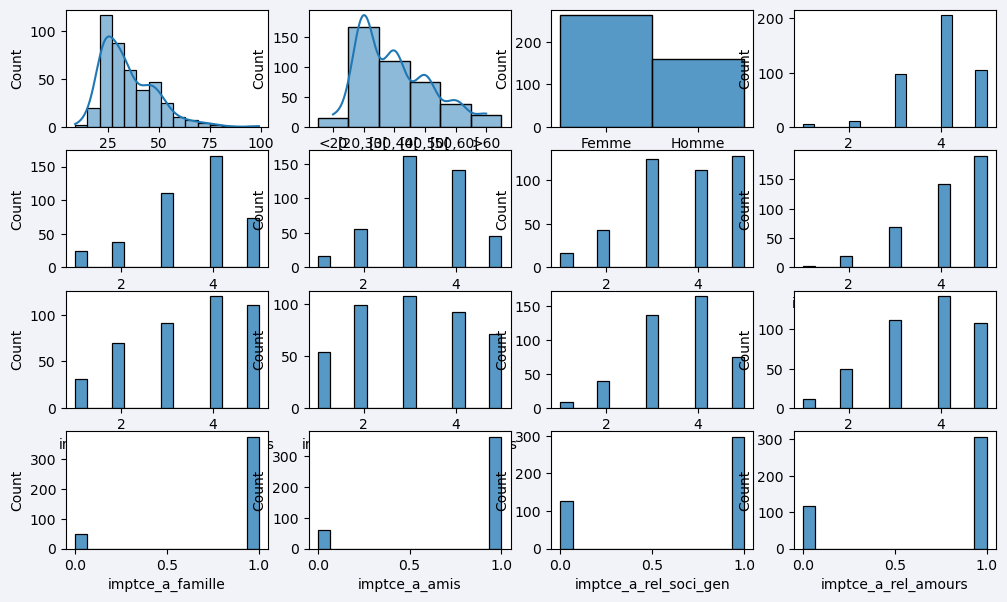

In [199]:
fig = plt.figure()

ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax14 = fig.add_subplot(4, 4, 14)
ax15 = fig.add_subplot(4, 4, 15)
ax16 = fig.add_subplot(4, 4, 16)

sns.histplot(data=bonheur_df, x="age", bins=15, kde=True, ax=ax1)
sns.histplot(data=bonheur_df, x="age_interval", bins=15, kde=True, ax=ax2)
sns.histplot(data=bonheur_df, x="sexe", bins=15, ax=ax3)
sns.histplot(data=bonheur_df, x="etes_vous_heureux", ax=ax4)
sns.histplot(data=bonheur_df, x="s_epanouit_au_travail", bins=15, ax=ax5)
sns.histplot(data=bonheur_df, x="importance_a_argent", bins=15, ax=ax6)
sns.histplot(data=bonheur_df, x="ville_ou_nature", bins=15, ax=ax7)
sns.histplot(data=bonheur_df, x="importance_temps_personnel", bins=15, ax=ax8)
sns.histplot(data=bonheur_df, x="importance_activites_sportives", bins=15, ax=ax9)
sns.histplot(data=bonheur_df, x="importance_activites_creatives", bins=15, ax=ax10)
sns.histplot(data=bonheur_df, x="prenez_soin_sante", bins=15, ax=ax11)
sns.histplot(data=bonheur_df, x="importance_dev_personnel", bins=15, ax=ax12)
sns.histplot(data=bonheur_df, x="imptce_a_famille", bins=15, ax=ax13)
sns.histplot(data=bonheur_df, x="imptce_a_amis", bins=15, ax=ax14)
sns.histplot(data=bonheur_df, x="imptce_a_rel_soci_gen", bins=15, ax=ax15)
sns.histplot(data=bonheur_df, x="imptce_a_rel_amours", bins=15, ax=ax16)

plt.show()

In [200]:
bonheur_df["sexe"].value_counts()

sexe
Femme    263
Homme    160
Name: count, dtype: int64

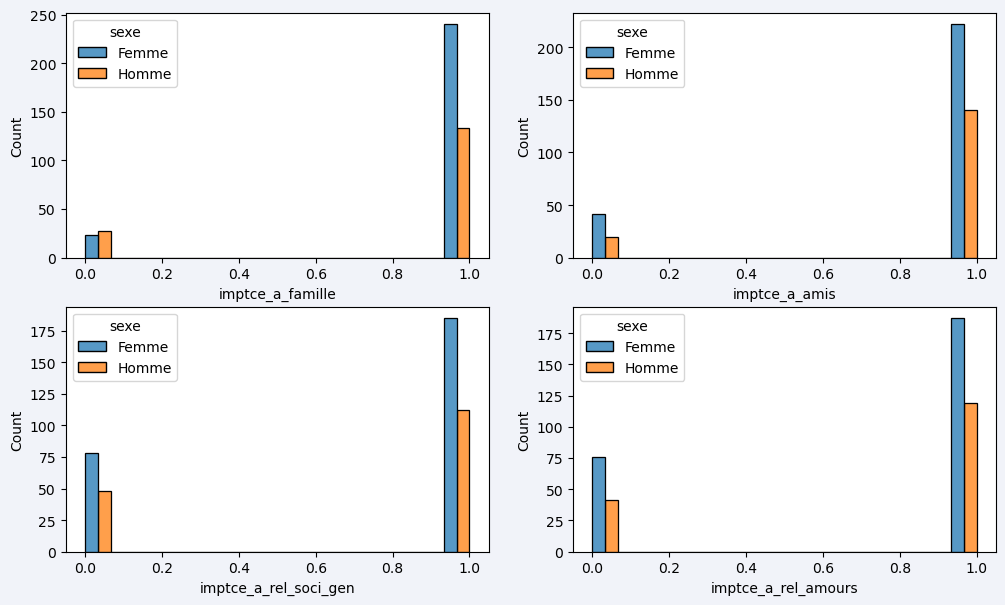

In [201]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.histplot(data=bonheur_df, x="imptce_a_famille", hue="sexe", bins=15, multiple="dodge", ax=ax1)
sns.histplot(data=bonheur_df, x="imptce_a_amis", hue="sexe", bins=15, multiple="dodge", ax=ax2)
sns.histplot(data=bonheur_df, x="imptce_a_rel_soci_gen", hue="sexe", bins=15, multiple="dodge", ax=ax3)
sns.histplot(data=bonheur_df, x="imptce_a_rel_amours", hue="sexe", bins=15, multiple="dodge", ax=ax4)

plt.show()

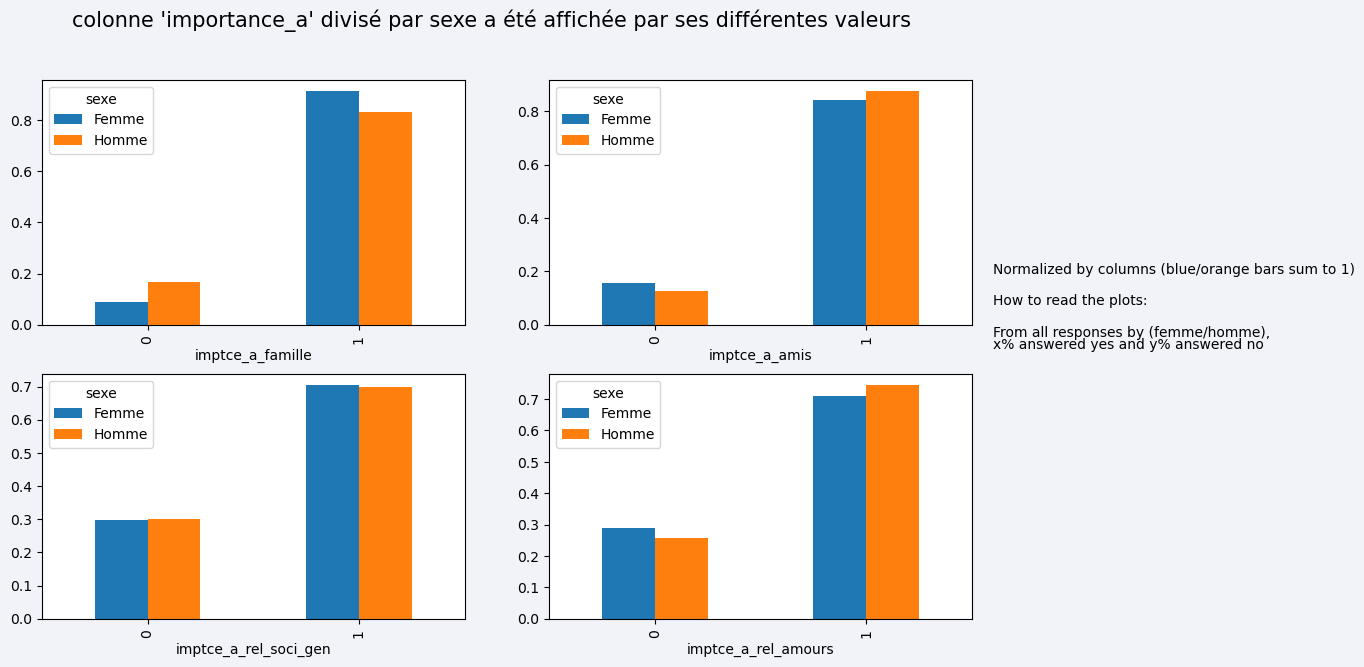

In [227]:
frequences1 = pd.crosstab(bonheur_df['imptce_a_famille'], bonheur_df['sexe'], normalize="columns")
frequences2 = pd.crosstab(bonheur_df['imptce_a_amis'], bonheur_df['sexe'], normalize="columns")
frequences3 = pd.crosstab(bonheur_df['imptce_a_rel_soci_gen'], bonheur_df['sexe'], normalize="columns")
frequences4 = pd.crosstab(bonheur_df['imptce_a_rel_amours'], bonheur_df['sexe'], normalize="columns")

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

frequences1.plot(kind='bar', stacked=False, ax=ax1)
frequences2.plot(kind='bar', stacked=False, ax=ax2)
frequences3.plot(kind='bar', stacked=False, ax=ax3)
frequences4.plot(kind='bar', stacked=False, ax=ax4)

fig.suptitle("colonne 'importance_a' divisé par sexe a été affichée par ses différentes valeurs", fontsize=15)
plt.text(1.6, 1.1, "Normalized by columns (blue/orange bars sum to 1)")
plt.text(1.6, 1, "How to read the plots:")
plt.text(1.6, 0.9, "From all responses by (femme/homme),")
plt.text(1.6, 0.86, "x% answered yes and y% answered no")
plt.show()
plt.show()

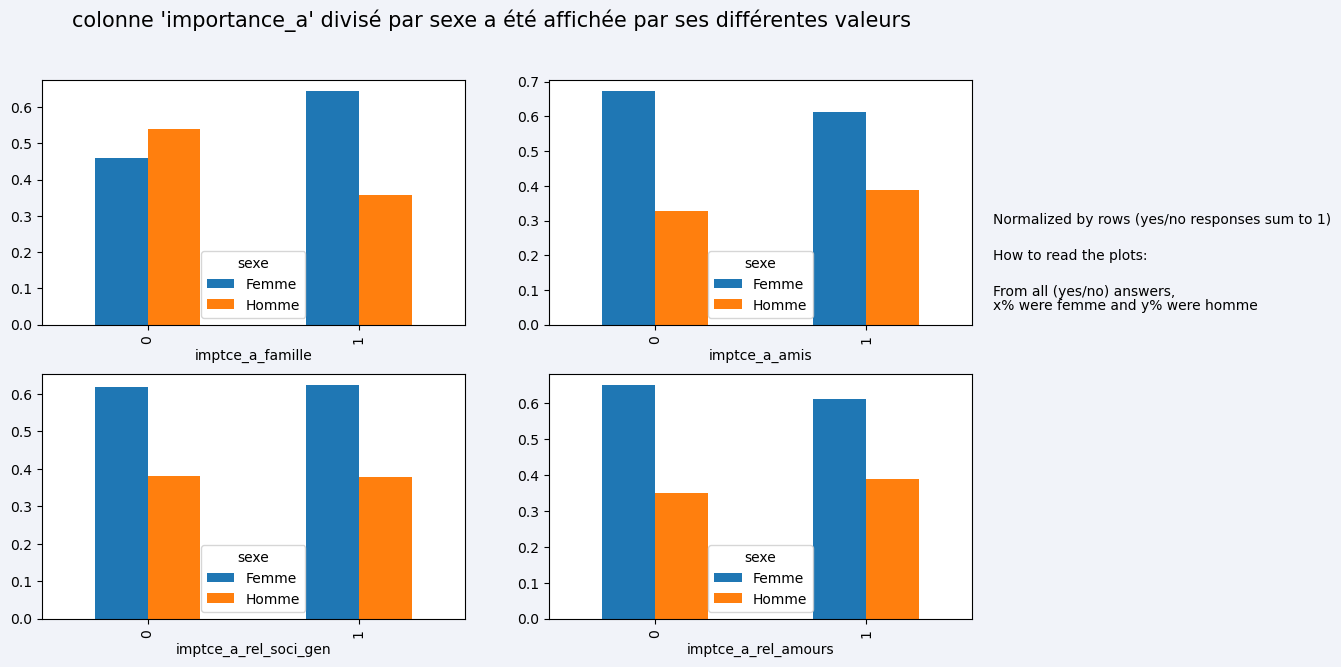

In [224]:
frequences1 = pd.crosstab(bonheur_df['imptce_a_famille'], bonheur_df['sexe'], normalize="index")
frequences2 = pd.crosstab(bonheur_df['imptce_a_amis'], bonheur_df['sexe'], normalize="index")
frequences3 = pd.crosstab(bonheur_df['imptce_a_rel_soci_gen'], bonheur_df['sexe'], normalize="index")
frequences4 = pd.crosstab(bonheur_df['imptce_a_rel_amours'], bonheur_df['sexe'], normalize="index")

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

frequences1.plot(kind='bar', stacked=False, ax=ax1)
frequences2.plot(kind='bar', stacked=False, ax=ax2)
frequences3.plot(kind='bar', stacked=False, ax=ax3)
frequences4.plot(kind='bar', stacked=False, ax=ax4)

fig.suptitle("colonne 'importance_a' divisé par sexe a été affichée par ses différentes valeurs", fontsize=15)
plt.text(1.6, 1.1, "Normalized by rows (yes/no responses sum to 1)")
plt.text(1.6, 1, "How to read the plots:")
plt.text(1.6, 0.9, "From all (yes/no) answers,")
plt.text(1.6, 0.86, "x% were femme and y% were homme")
plt.show()

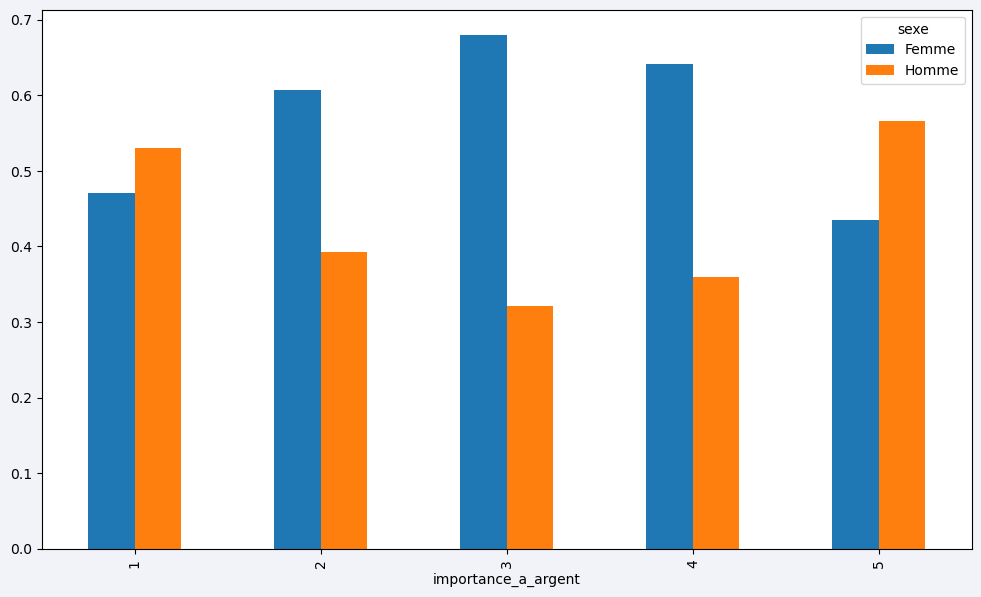

In [204]:
frequences_argent = pd.crosstab(bonheur_df['importance_a_argent'], bonheur_df['sexe'], normalize="index")

fig = plt.figure()

ax1 = fig.add_subplot()

frequences_argent.plot(kind='bar', stacked=False, ax=ax1)

#fig.suptitle("colonne 'importance_a' divisé par sexe a été affichée par ses différentes valeurs", fontsize=15)
#plt.text(2, 1.1, "normalized by rows (yes/no responses sum to 1)")
#plt.text(2, 1, "How to read the plots:")
#plt.text(2, 0.9, "From all (yes/no) answers,")
#plt.text(2, 0.86, "x% were femme and y% were homme")
plt.show()

In [213]:
frequences_argent = pd.crosstab(bonheur_df["importance_a_argent"],
                                columns=[bonheur_df["age_interval"], bonheur_df["sexe"]], normalize="index")
frequences_argent

age_interval              <20             [20,30[             [30,40[  \
sexe                    Femme     Homme     Femme     Homme     Femme   
importance_a_argent                                                     
1                    0.058824  0.058824  0.176471  0.117647  0.000000   
2                    0.017857  0.017857  0.214286  0.160714  0.160714   
3                    0.024691  0.018519  0.216049  0.117284  0.154321   
4                    0.014085  0.000000  0.260563  0.119718  0.169014   
5                    0.000000  0.043478  0.304348  0.391304  0.086957   

age_interval                    [40,50[             [50,60[            \
sexe                    Homme     Femme     Homme     Femme     Homme   
importance_a_argent                                                     
1                    0.235294  0.117647  0.117647  0.117647  0.000000   
2                    0.125000  0.160714  0.071429  0.053571  0.017857   
3                    0.080247  0.135802  0.043210  0.098765  0.037037   
4                    0.140845  0.119718  0.070423  0.049296  0.021127   
5                    0.086957  0.021739  0.021739  0.000000  0.000000   

age_interval              >60            
sexe                    Femme     Homme  
importance_a_argent                      
1                    0.000000  0.000000  
2                    0.000000  0.000000  
3                    0.049383  0.024691  
4                    0.028169  0.007042  
5                    0.021739  0.021739

<Axes: xlabel='importance_a_argent'>

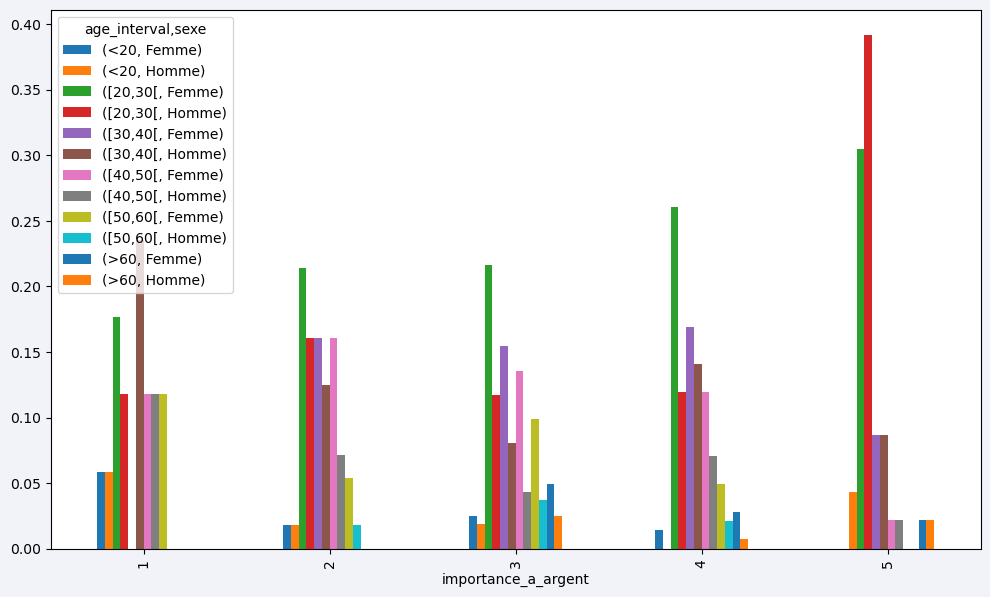

In [214]:
fig = plt.figure()

ax1 = fig.add_subplot()

frequences_argent.plot(kind='bar', stacked=False, ax=ax1)

In [218]:
frequences_argent = pd.crosstab(bonheur_df["importance_a_argent"],
                                columns=[bonheur_df["sexe"], bonheur_df["age_interval"]], normalize="columns")
frequences_argent

sexe                 Femme                                                    \
age_interval           <20   [20,30[   [30,40[   [40,50[   [50,60[       >60   
importance_a_argent                                                            
1                    0.125  0.029703  0.000000  0.039216  0.071429  0.000000   
2                    0.125  0.118812  0.145161  0.176471  0.107143  0.000000   
3                    0.500  0.346535  0.403226  0.431373  0.571429  0.615385   
4                    0.250  0.366337  0.387097  0.333333  0.250000  0.307692   
5                    0.000  0.138614  0.064516  0.019608  0.000000  0.076923   

sexe                    Homme                                                  
age_interval              <20   [20,30[   [30,40[   [40,50[ [50,60[       >60  
importance_a_argent                                                            
1                    0.142857  0.030769  0.083333  0.083333     0.0  0.000000  
2                    0.142857  0.138462  0.145833  0.166667     0.1  0.000000  
3                    0.428571  0.292308  0.270833  0.291667     0.6  0.666667  
4                    0.000000  0.261538  0.416667  0.416667     0.3  0.166667  
5                    0.285714  0.276923  0.083333  0.041667     0.0  0.166667

In [220]:
frequences_argent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 5
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Femme, <20)      5 non-null      float64
 1   (Femme, [20,30[)  5 non-null      float64
 2   (Femme, [30,40[)  5 non-null      float64
 3   (Femme, [40,50[)  5 non-null      float64
 4   (Femme, [50,60[)  5 non-null      float64
 5   (Femme, >60)      5 non-null      float64
 6   (Homme, <20)      5 non-null      float64
 7   (Homme, [20,30[)  5 non-null      float64
 8   (Homme, [30,40[)  5 non-null      float64
 9   (Homme, [40,50[)  5 non-null      float64
 10  (Homme, [50,60[)  5 non-null      float64
 11  (Homme, >60)      5 non-null      float64
dtypes: float64(12)
memory usage: 520.0 bytes


In [233]:
bonheur_df["prenez_soin_sante"].value_counts()

prenez_soin_sante
4    164
3    136
5     75
2     39
1      9
Name: count, dtype: int64

In [235]:
prop_sante_age = pd.crosstab(bonheur_df["prenez_soin_sante"], 
							bonheur_df["age_interval"], 
							)

chi2, pvalue, dof, expected = chi2_contingency(prop_sante_age)

print(f"Statistique Khi-deux : {chi2:.2f}")
print(f"P-value : {pvalue:.4f}")
print(f"Degrés de liberté : {dof}")
print("Tableau des effectifs attendus sous H0 :\n", expected)

Statistique Khi-deux : 35.83
P-value : 0.0161
Degrés de liberté : 20
Tableau des effectifs attendus sous H0 :
 [[ 0.31914894  3.53191489  2.34042553  1.59574468  0.80851064  0.40425532]
 [ 1.38297872 15.30496454 10.14184397  6.91489362  3.5035461   1.75177305]
 [ 4.82269504 53.37115839 35.36643026 24.11347518 12.21749409  6.10874704]
 [ 5.81560284 64.35933806 42.64775414 29.07801418 14.73286052  7.36643026]
 [ 2.65957447 29.43262411 19.5035461  13.29787234  6.73758865  3.36879433]]


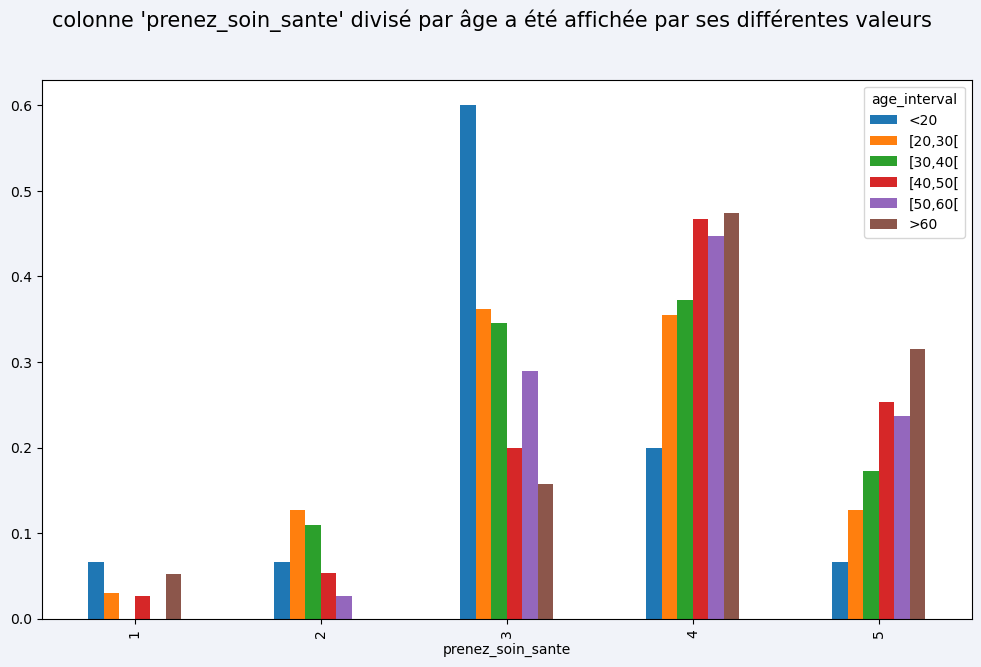

In [246]:
prop_sante_age = pd.crosstab(bonheur_df["prenez_soin_sante"], bonheur_df["age_interval"], normalize="columns")

fig = plt.figure()

ax1 = fig.add_subplot()

prop_sante_age.plot(kind='bar', stacked=False, ax=ax1)

fig.suptitle("colonne 'prenez_soin_sante' divisé par âge a été affichée par ses différentes valeurs", fontsize=15)
#plt.text(1.6, 1.1, "Normalized by rows (yes/no responses sum to 1)")
#plt.text(1.6, 1, "How to read the plots:")
#plt.text(1.6, 0.9, "From all (yes/no) answers,")
#plt.text(1.6, 0.86, "x% were femme and y% were homme")
plt.show()

fazer algum teste de medias

ttstudent para medias

por exeplo: a media de cuidado com a saude na faixa etaria >60 é superior que nas outras faixas

In [207]:
bonheur_df.head()

,sexe,age,departement,etes_vous_heureux,importance_a,s_epanouit_au_travail,importance_a_argent,ville_ou_nature,importance_temps_personnel,importance_activites_sportives,...,endroit_img,faites_temp_person,rend_heureux_quotdn,but_dans_la_vie,qqc_etre_heureux,imptce_a_famille,imptce_a_amis,imptce_a_rel_soci_gen,imptce_a_rel_amours,age_interval
0,Femme,24,38,3,"Votre famille, Vos amis, Vos relations amoureu...",3.0,2,5,5,2,...,"C'est une vaste plaine, avec énormément de fle...","Des créations artistiques (bijoux, dessins, br...",Savoir que les personnes qui m'entourent vont ...,"Être heureux, trouver le bonheur.","Être dans un bon état d'esprit, sans angoissé ...",1,1,1,1,"[20,30["
1,Femme,22,38,4,"Votre famille, Vos amis, Vos relations amoureu...",3.0,5,4,5,2,...,"Un endroit ni calme, ni bruyant, confortableme...","Manger, ou dormir.","Les petits plaisirs de la vie, la colloc, la f...","Je n'en ai pas spécialement, avoir les bonnes ...","Pour moi, c'est être satisfait de soi-même, de...",1,1,1,1,"[20,30["
2,Femme,24,38,4,"Votre famille, Vos amis, Vos relations amoureu...",5.0,3,4,2,4,...,Une table de Noël avec toute ma famille et les...,Je prend soin de moi,Etre avec les gens que j'aime,Fonder une famille plein d'amour,"Etre bien dans sa peau, dans sa vie. Et être e...",1,1,1,1,"[20,30["
3,Femme,30,1,4,"Votre famille, Vos amis, Vos relations amoureuses",4.0,5,4,3,2,...,"Dans la nature, surtout près de l'eau",Prendre du temps pour moi,"Ma maison, mes chats, mon chéri",Être pleinement épanouie entre ma vie perso (u...,"Accomplir son objectif de vie, faire ce qui no...",1,1,0,1,"[30,40["
4,Homme,33,77,4,"Votre famille, Vos amis, Vos relations amoureuses",3.0,5,1,5,3,...,Avec ma famille dans un parc,Me reposer,Manger et se reposer,Que ma famille ne manque de rien,Avoir la paix intérieure,1,1,0,1,"[30,40["


In [221]:
bonheur_df["qqc_etre_heureux"].value_counts()

qqc_etre_heureux
Le bonheur est un état d’esprit                                                                                                                                                                                                                                                                                                                    4
Profiter de ce que l’on a, changer ce qui ne nous convient pas, rire, partager, aimer, crier, sauter, chanter, trinquer ....!!!!                                                                                                                                                                                                                   2
Se sentir bien, léger, et sourire naturellement sans se forcer                                                                                                                                                                                                                                               

In [208]:
bonheur_df["but_dans_la_vie"].value_counts()

but_dans_la_vie
Être heureux                                                                                                                                                                                                                                              6
Être heureux                                                                                                                                                                                                                                              4
Aller au Paradis                                                                                                                                                                                                                                          4
Être heureuse                                                                                                                                                                                                                       

In [209]:
bonheur_df["faites_temp_person"].value_counts()

faites_temp_person
Du sport                                                                                                                                                                                                                                                                                                            8
Sport                                                                                                                                                                                                                                                                                                               6
Lire                                                                                                                                                                                                                                                                                                                5
Je m’occupe de ma famille                          

In [210]:
bonheur_df["endroit_img"].value_counts()

endroit_img
Insulaire                                                                                                                                                             4
Mon lit                                                                                                                                                               3
Nsp                                                                                                                                                                   3
Montagne                                                                                                                                                              2
À la montagne pieds nus dans l’herbe et les oiseaux en bruit de fond                                                                                                  2
                                                                                                                                                    

In [211]:
bonheur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   sexe                            423 non-null    object  
 1   age                             423 non-null    int64   
 2   departement                     423 non-null    int64   
 3   etes_vous_heureux               423 non-null    int64   
 4   importance_a                    423 non-null    object  
 5   s_epanouit_au_travail           414 non-null    float64 
 6   importance_a_argent             423 non-null    int64   
 7   ville_ou_nature                 423 non-null    int64   
 8   importance_temps_personnel      423 non-null    int64   
 9   importance_activites_sportives  423 non-null    int64   
 10  importance_activites_creatives  423 non-null    int64   
 11  prenez_soin_sante               423 non-null    int64   
 12  importance_dev_personn

## COMPETENCE - Réaliser une mini infographie d'une demie page avec au moins 5 informations intéressantes découvertes (dont au moins 2 tests d'hypothèses) dans ce jeu de données

#  Sujet 3 (bonus) : Application mobile : jeu Cookie Cats

Les données sont issues de Kaggle : https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing

Les tests statistiques sont également utilisés dans le test de nouvelles fonctionnalités (application, site web,...), afin de voir si mettre un bouton en turquoise attire plus qu'un bouton en fushia par exemple.

Ressources :
- https://fr.wikipedia.org/wiki/Test_A/B
- 🌞 https://www.youtube.com/watch?v=BmNBxAhatYI

Importez les données :

In [84]:
data_path = Path().resolve().parent / "data"

cookie_cats_data = pd.read_csv(data_path/"cookie_cats.csv", delimiter=",")
cookie_cats_data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Regardez globalement ce qu'il y a dedans :

Nous avons ici plusieurs informations :
- userid : identifiant de l'utilisateur
- version : les deux versions de l'application à comparer
- les indicateurs de performance de l'application :
    - sum_gamerounds : le nombre de tours de jeu joués par le joueur au cours des 14 premiers jours suivant l'installation
    - retention_1 : est-ce que le joueur est revenu et a joué 1 jour après l'installation ?
    - retention_7 : est-ce que le joueur est revenu et a joué 7 jours après l'installation ?

L'idée ici va être de regarder quelle version de l'application permet une meilleure performance de cette dernière en moyenne.

Commençons par créer les deux groupes à comparer :

## En terme de nombre de tours joués par le joueur au cours des 14 premiers jours, quelle version est la meilleure ?

## Par rapport aux joueurs qui reviennent 1 jour après l'installation, quelle version est la meilleure ?

## Par rapport aux joueurs qui reviennent 7 jours après l'installation, quelle version est la meilleure ?

## Quelle version devrait choisir l'éditeur selon vous ?

# BONUS

## Création de nouvelles variables afin d'étoffer l'analyse

Regardez la distribution des âges ou basez vous sur vos propres critères afin de définir des classes d'âge. </br>
Pouvez-vous déceler des informations intéressantes sur les jeunes, les vieux ?

## Nettoyage des données aberrantes

Certaines données extrêmes semblent bizarres, peut-être fausses, il pourrait être intéressant de les enlever dans nos analyses

## Analyse des questions ouvertes

Comment peut-on analyser les questions ouvertes ?

## Tests sur la variance

Il est également possible de réaliser des tests sur la variance. </br>
Si ça vous intéresse n'hésitez pas à creuser le sujet ;)